
# **Introduction:**

The proposed project is relevant in today's world because credit card approval is a critical process for banks and financial sectors. In India, with the growing demand for credit, the number of credit card applications is increasing rapidly. However, manual traditional credit assessment methods are time-consuming and may lead to potential errors and delays.

Furthermore, with the increasing demand for digital banking and financial services, machine learning models can be integrated into online credit card applications, providing an efficient and convenient solution for customers to apply for credit cards. This can also enhance the customer experience and increase customer loyalty.


The datasets and the features are described as follows:



*Credit_card.csv*

>Ind_ID: Client ID

>Gender: Gender information

>Car_owner: Having car or not

>Propert_owner: Having property or not

>Children: Count of children

>Annual_income: Annual income

>Type_Income: Income type

>Education: Education level

>Marital_status: Marital_status

>Housing_type: Living style

>Birthday_count: Use backward count from current day (0), -1 means yesterday.

>Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

>Mobile_phone: Any mobile phone

>Work_phone: Any work phone

>Phone: Any phone number

>EMAIL_ID: Any email ID

>Type_Occupation: Occupation

>Family_Members: Family size

*Credit_card_label.csv*

> Ind_ID: Client ID

> Label: 0 is application approved and 1 is application rejected. 






# **Objective:**

The objective of this project is to build a machine learning model that accurately predicts credit card approval outcomes. The model can provide insights into the most important factors that impact credit card approval, allowing banks to make informed decisions quickly and accurately. This can result in a faster and more efficient credit card approval process, reducing the time and cost associated with manual credit assessment methods.

Overall, the proposed project has the potential to improve the credit card approval process, reduce manual effort and errors, and enhance the customer experience. It demonstrates the potential of machine learning in automating and improving critical banking processes and can have significant benefits for banks and financial institutions in India.


# **Steps for the project:**

The project will follow the following steps:



## Feature engineering Data preprocessing: 
In this step we will merge the given two dataframes and will clean and preprocess the data to ensure its quality and suitability for machine learning analysis. Also we will do some exploration of the data. We will deal with missing values and outliers if any and then we will do encoding on the categorical features.

## Data Transformation:
We will do transform the continuous features if the data is skewed.


## Feature Selection:
We will perform several feature selection techniques such as correlation test, Chi Squared test etc to select the most important features.

## Feature Scaling:
We will scale the continuous features in this step using StandardScaler.

## Model training and validation: 
We will train and validate the following machine learning algorithms:
1. Logistic Regression
2. K Nearest Neighbours
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. Extreme Gradiant Boosting
7. Naive Bayes


## Model evaluation: 
We will evaluate the performance of the trained models using metrics such as accuracy, precision, recall, F1 score, AUC value, and Cross validation value. Then we will perform hyperparameter tuning to all the models. We will also perform a sensitivity analysis to identify the most important features that impact model performance.

## Conclusion:

Finally we will arrive to the decision about what are the most important features and which machine learning model can be used for seemingly good accuracy of Credit card approval prediction purpose. 



#**Importing all neccesary libraries**

In [1]:
! pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 14.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=606ef592ce5a0e08834f81a5d4cc0b365f188038f145c701dd480b4909ff6fce
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=6efe14517622bd3a66f87b96c2c1175b6ca0bacb96911a0dd5225565e52c64db
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [2]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.6 MB/s eta 0:00:00


In [3]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import pylab
import scipy.stats as stat
from scipy.stats import boxcox
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ranksums
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **Feature Engineering**

In [4]:
# Reading the datasets
cc = pd.read_csv("/content/Credit_card.csv")
ccv = pd.read_csv("/content/Credit_card_label.csv")
df1 = cc.copy()  # Creating a copy of the dataset
df2 = ccv.copy()  # Creating a copy of the dataset

In [5]:
df1.head()   # showing first 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [6]:
df1.tail()   # showing last 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2

In [7]:
df1.shape   # # Shape of the dataset

(1548, 18)

In [8]:
df2.head()   # showing first 5 rows

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [9]:
df2.tail()   # showing last 5 rows

Ind_ID  label
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

In [10]:
df2.shape  # Shape of the dataset

(1548, 2)

Both the datasets have same number of records and have a common column Ind_ID. We need to join them based on the common column.

## Merging the two dataframes





In [11]:
data = pd.merge(df1,df2,how = "inner")   # Using inner join method to merge two dataframes

## Basic data exploration

In [12]:
data.head()   # showing first 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [13]:
data.tail()   # showing last 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

In [14]:
data.shape   # Shape of the dataset

(1548, 19)

In [15]:
data.info()   # Basic informations of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [16]:
data.describe(include = "all")   # Describing the dataset

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members        label  
count      1548.000000  1548.000000  
unique             NaN          NaN  
top                NaN          NaN  
freq               NaN          NaN  
mean          2.161499     0.113049  
std           0.947772     0.316755  
min           1.000000     0.000000  
25%           2.000000     0.000000  
50%           2.000000     0.000000  
75%           3.000000     0.000000  
max          15.000000     1.000000

In [17]:
data.nunique()  # Showing how many unique values are present in each column

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

There might be some cases where same person applied more than once. Now we are going to check if there are any duplicate entries in the dataset.

In [18]:
print(data.duplicated().value_counts())   # Checking duplicate entries

False    1548
dtype: int64


In [19]:
# checking for duplicate entries without considering the 'Ind_ID' column
duplicates = data.duplicated(subset=['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'])
print(duplicates.value_counts())

False    1386
True      162
dtype: int64


In [20]:
data.shape  # Shape before removing duplicates

(1548, 19)

In [21]:
# removeing duplicate rows without considering the 'Ind_ID' column
data = data.drop_duplicates(subset=['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'])

In [22]:
data.shape   # Shape after removing duplicates

(1386, 19)

In the case of credit card approval prediction, it is generally more meaningful to use age as a feature rather than a count of days since birth. Age is a continuous numerical variable that is often used as a factor in credit risk assessment, as it can help to predict an individual's creditworthiness and likelihood of repayment.

The similar reason is for employeed_days too.

<Axes: xlabel='Birthday_count', ylabel='Count'>

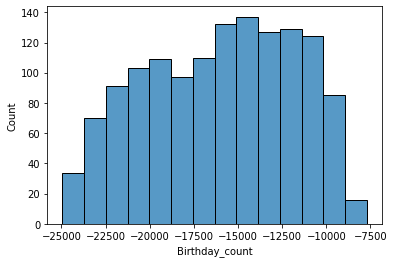

In [23]:
sns.histplot(data["Birthday_count"])

In [24]:
data["Age"]= -round(data["Birthday_count"]/365.25)   # Creating age column with the help of Birthday_count column
data = data.drop("Birthday_count",axis = 1)   # Dropping Birthday_count column

<Axes: xlabel='Age', ylabel='Count'>

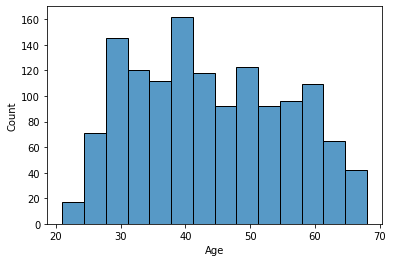

In [25]:
sns.histplot(data["Age"])

In [26]:
f = lambda x: round(-x/365.25) if x<0 else 0
data["Employeed_years"]=data["Employed_days"].map(f)    # Creating Employeed_years column with the help of Employed_days column
data = data.drop("Employed_days",axis = 1)    # Dropping Employed_days column

In [27]:
data.head()   # Showing first 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
5  5009753    NaN         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
5             Pensioner  Higher education        Married  House / apartment   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  \
0             1           0      0         0             NaN               2   
1             1           1      1         0             NaN               2   
2             1           1      1         0             NaN               2   
3             1           1      1         0             NaN               2   
5             1           1      1         0             NaN               2   

   label   Age  Employeed_years  
0      1  51.0                0  
1      1  37.0                2  
2      1   NaN                2  
3      1  37.0                2  
5      1  37.0                2

In [28]:
for i in data.columns:
  print("---",i,"---")
  print(data[i].unique())  # Checking the unique values that are present in each column

--- Ind_ID ---
[5008827 5009744 5009746 ... 5023655 5118219 5053790]
--- GENDER ---
['M' 'F' nan]
--- Car_Owner ---
['Y' 'N']
--- Propert_Owner ---
['Y' 'N']
--- CHILDREN ---
[ 0  1  2  4  3 14]
--- Annual_income ---
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   5

Here we can see an unusual case where number of children is 14. This might be the same record where number of family is 15.

we will deal with it in the outlier section.

## Dealing with missing values

In [29]:
data.isnull().sum()   # Total number of missing values in each column

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    438
Family_Members       0
label                0
Age                 22
Employeed_years      0
dtype: int64

<Axes: >

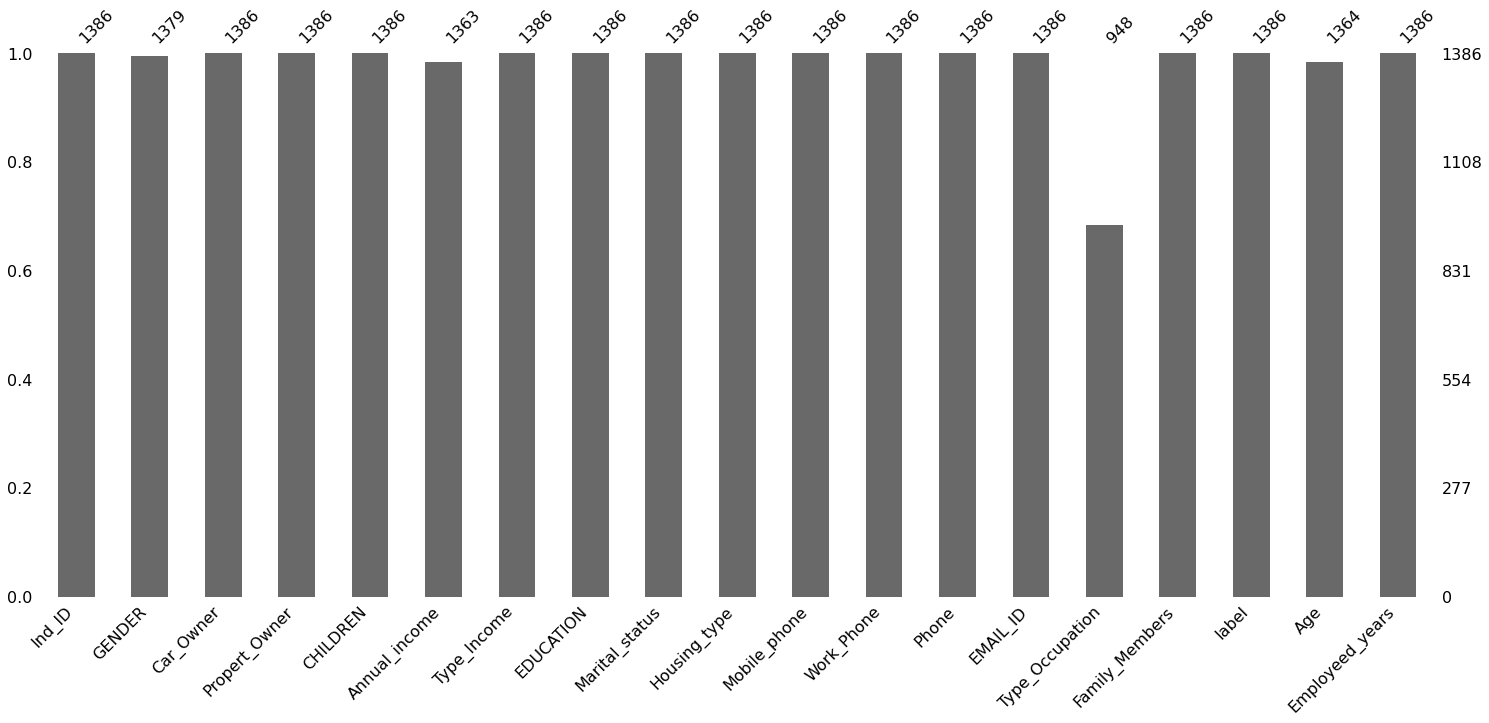

In [30]:
# Creating bar chart to see the missing values
msno.bar(data)

<Axes: >

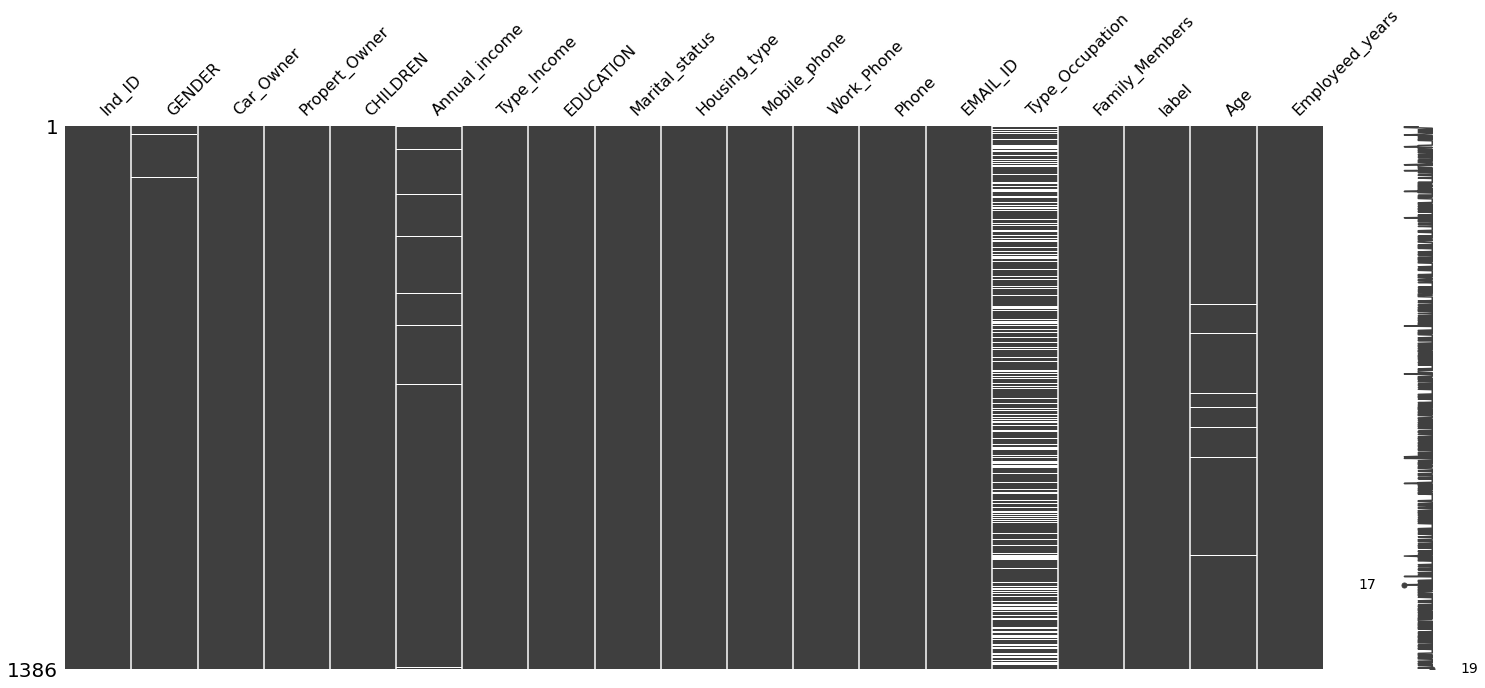

In [31]:
# Creating matrix to check the pattern of the missing values
msno.matrix(data)

Observations :
1. We cannot see any pattern in the missing values.
2. The Type_Occupation column has almost 30% missing values so keeping the column might not be a good option. So we are going to drop the column.
3. GENDER column has very less number of missing values so we can delete the rows.
4. The continuous features Annual_income and Age are having some errors. We can fill the values by a suitable imputation technique.

In [32]:
# Dropping the Type_Occupation column
data = data.drop(["Type_Occupation"],axis = 1)

In [33]:
data.isnull().sum()   # Total number of missing values in each column

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Mobile_phone        0
Work_Phone          0
Phone               0
EMAIL_ID            0
Family_Members      0
label               0
Age                22
Employeed_years     0
dtype: int64

In [34]:
# Dropping the missing rows for GENDER column using dropna() function
data.dropna(subset = ["GENDER"],inplace = True)

In [35]:
data_mean=data.copy(deep=True) # creating copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
data_mean.iloc[:, [5,16]] = mean_imputer.fit_transform(data_mean.iloc[:, [5,16]])   # 5 indecates to Annual_income and 16 indecates to Age

In [36]:
data_median =data.copy(deep=True)
median_imputer = SimpleImputer(strategy='median') # using median to impute value
data_median.iloc[:, [5,16]] = median_imputer.fit_transform(data_median.iloc[:, [5,16]])


In [37]:
data_mode =data.copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent') # using mode to impute value
data_mode.iloc[:, [5,16]] = mode_imputer.fit_transform(data_mode.iloc[:, [5,16]] )

In [38]:
data_constant =data.copy(deep=True)
constant_imputer = SimpleImputer(strategy='constant', fill_value = 0) # using 0 to impute value
data_constant.iloc[:, [5,16]] = constant_imputer.fit_transform(data_constant.iloc[:, [5,16]])

In [39]:
data_knn =data.copy(deep=True)
KNN_imputer = KNN() # calling KNN function
data_knn.iloc[:, [5,16]] = KNN_imputer.fit_transform(data_knn.iloc[:, [5,16]])

Imputing row 1/1379 with 0 missing, elapsed time: 0.359
Imputing row 101/1379 with 0 missing, elapsed time: 0.360
Imputing row 201/1379 with 0 missing, elapsed time: 0.361
Imputing row 301/1379 with 0 missing, elapsed time: 0.362
Imputing row 401/1379 with 0 missing, elapsed time: 0.363
Imputing row 501/1379 with 0 missing, elapsed time: 0.364
Imputing row 601/1379 with 0 missing, elapsed time: 0.365
Imputing row 701/1379 with 0 missing, elapsed time: 0.366
Imputing row 801/1379 with 0 missing, elapsed time: 0.367
Imputing row 901/1379 with 0 missing, elapsed time: 0.368
Imputing row 1001/1379 with 0 missing, elapsed time: 0.369
Imputing row 1101/1379 with 0 missing, elapsed time: 0.370
Imputing row 1201/1379 with 0 missing, elapsed time: 0.370
Imputing row 1301/1379 with 0 missing, elapsed time: 0.371


In [40]:
data_mice =data.copy(deep=True)
MICE_imputer = IterativeImputer() # calling IterativeImputer function
data_mice.iloc[:, [5,16]] = MICE_imputer.fit_transform(data_mice.iloc[:, [5,16]])

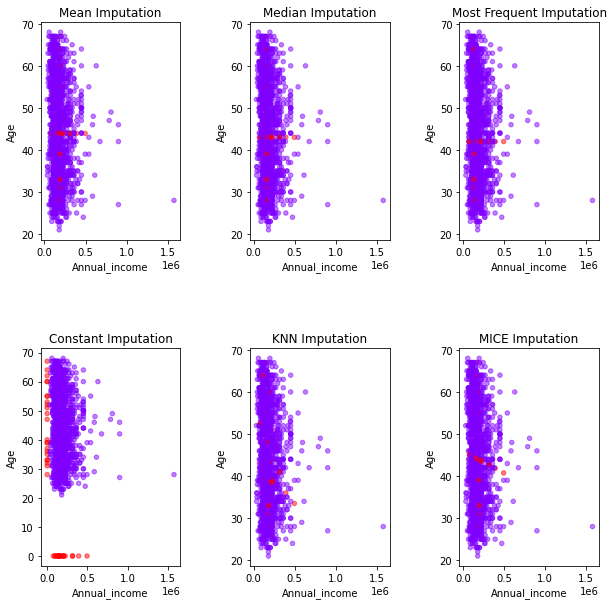

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10)) # creating 2 rows and 3 columns
nullity = data['Annual_income'].isnull() + data['Age'].isnull() # creating null columns between Annual_income and Age
imputations = {'Mean Imputation': data_mean, # creating a python dictionary
               'Median Imputation': data_median,
               'Most Frequent Imputation': data_mode,
               'Constant Imputation': data_constant,
               'KNN Imputation': data_knn,
              'MICE Imputation': data_mice}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='Annual_income', y='Age', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)
fig.subplots_adjust(wspace=0.5,hspace=0.5)   # adding some gaps between the subplots

From the charts we can clearly see that KNN imputation is the better approach for filling up the missing values.

## Dealing with outliers


In [42]:
data_knn.head()  # showing first 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       195300.0   
7  5009894      F         N             N         0       180000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1  Commercial associate               Higher education        Married   
2  Commercial associate               Higher education        Married   
3  Commercial associate               Higher education        Married   
7             Pensioner  Secondary / secondary special        Married   

        Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  House / apartment             1           0      0         0   
1  House / apartment             1           1      1         0   
2  House / apartment             1           1      1         0   
3  House / apartment             1           1      1         0   
7  House / apartment             1           0      0         0   

   Family_Members  label   Age  Employeed_years  
0               2      1  51.0                0  
1               2      1  37.0                2  
2               2      1  41.0                2  
3               2      1  37.0                2  
7               2      1  61.0                0

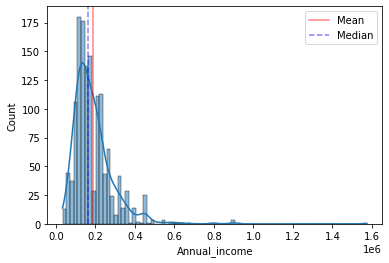

In [43]:
sns.histplot(data = data_knn["Annual_income"], kde = True)  # Plotting histogram for Annual_income column to see the distribution
plt.axvline(x=data_knn.Annual_income.mean(),color='red',alpha=0.5,label='Mean')    # Plotting a line for mean
plt.axvline(x=data_knn.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')   # Plotting a line for median
plt.legend()  # Showing the legends in the plot

<Axes: >

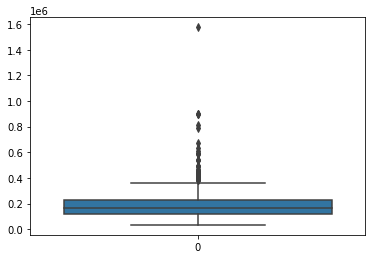

In [44]:
sns.boxplot(data_knn["Annual_income"])   # Plotting box plot to observe the outliers more clearly

The Annual_income column is highly right skewed. Income distribution is often highly skewed. It follows a skewed distribution with a long tail of high earners. In such cases, it is not uncommon to observe extreme values that may be considered outliers. However, these values may reflect genuine income disparities, and removing them can result in loss of important information.

But when we run our model after not removing the outliers then in the feature selection (U test) the p value of Annual_income column was very high (0.9427386792040371). 

So statistically we need to remove the column. But in real life scenario, annual income plays a crutial role for credit card approval. 

This is why we are going to remove the outliers.

In [45]:
q1 = data_knn["Annual_income"].quantile(0.25)   # 25th percentile
q3 = data_knn["Annual_income"].quantile(0.75)   # 75th percentile
iqr = q3 - q1   # inter quantile range
upper = q3 + (1.5 * iqr)   # setting the upper limit
lower = q1 - (1.5 * iqr)   # setting the lower limit
data_knn = data_knn.loc[(data_knn["Annual_income"] >= lower) & (data_knn["Annual_income"] <= upper)]
 

<Axes: xlabel='Annual_income', ylabel='Count'>

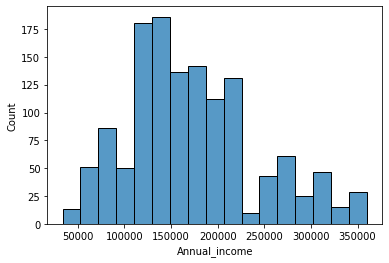

In [46]:
sns.histplot(data_knn["Annual_income"])

<Axes: >

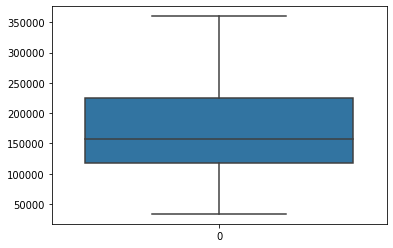

In [47]:
sns.boxplot(data_knn["Annual_income"])

In [48]:
data_knn.shape   # Shape of the dataset

(1317, 18)

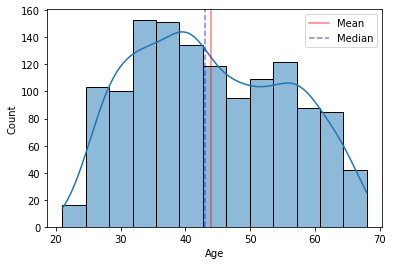

In [49]:
sns.histplot(data_knn["Age"],kde=True)   # Plotting histogram for Age column to see the distribution
plt.axvline(x=data_knn.Age.mean(),color='red',alpha=0.5,label='Mean')   # Plotting a line for mean
plt.axvline(x=data_knn.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')   # Plotting a line for median
plt.legend()   # Showing the legends in the plot

There is no outlier present in the Age column.

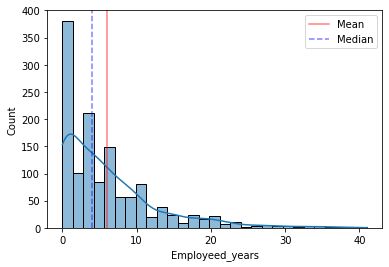

In [50]:
sns.histplot(data_knn["Employeed_years"],kde=True)   # Plotting histogram for Employeed_years column to see the distribution
plt.axvline(x=data_knn.Employeed_years.mean(),color='red',alpha=0.5,label='Mean')   # Plotting a line for mean
plt.axvline(x=data_knn.Employeed_years.median(),c='blue',ls='--',alpha=0.5,label='Median')   # Plotting a line for median
plt.legend()   # Showing the legends in the plot

<Axes: >

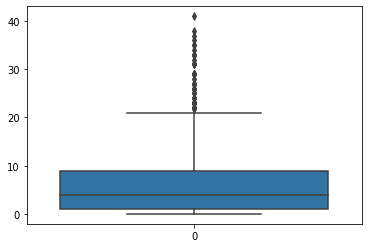

In [51]:
sns.boxplot(data_knn["Employeed_years"])   # Plotting box plot to observe the outliers more clearly

The box plot and the histogram tells us that the data is right skewed but an employee with 40 years of work experience may be a valid and meaningful data point.So we cannot remove these outlier. Removing these outliers can bias the models towards a particular direction, leading to less accurate predictions and can significantly affect the results of data analysis, such as the mean or standard deviation.

<Axes: xlabel='CHILDREN', ylabel='count'>

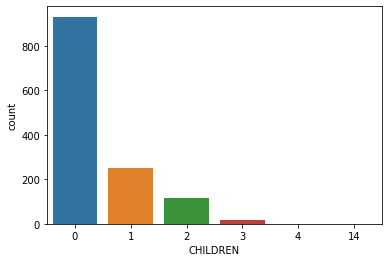

In [52]:
sns.countplot(x=data_knn["CHILDREN"])  # Plotting Barchart of CHILDREN column

In [53]:
data_knn["CHILDREN"].unique()

array([ 0,  2,  1,  4,  3, 14])

In [54]:
data_knn["CHILDREN"].sort_values(ascending = False)

565     14
121      4
1230     3
1519     3
1026     3
        ..
623      0
626      0
627      0
629      0
1547     0
Name: CHILDREN, Length: 1317, dtype: int64

There is one entry with number of children 14. We don't have enough information to check this entry is legitimate or it is a data entry error. So we are going to remove this entry.

In [55]:
data_knn.loc[[565],:]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
565  5061207      M         Y             Y        14       225000.0   

    Type_Income                      EDUCATION Marital_status  \
565     Working  Secondary / secondary special      Separated   

          Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
565  House / apartment             1           0      0         0   

     Family_Members  label   Age  Employeed_years  
565              15      0  49.0                5

In [56]:
data_knn=data_knn.drop([565])  # removing the rows using drop()

In [57]:
data_cleaned= data_knn.copy()   # Creating a copy of the dataset

In [58]:
data_cleaned.to_csv('data_cleaned.csv', index=False)  # Exporting the clean data

## **Encoding the categorical features**

In [59]:
data_cleaned.head()   # showing first 5 rows

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0       195300.0   
7  5009894      F         N             N         0       180000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1  Commercial associate               Higher education        Married   
2  Commercial associate               Higher education        Married   
3  Commercial associate               Higher education        Married   
7             Pensioner  Secondary / secondary special        Married   

        Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  House / apartment             1           0      0         0   
1  House / apartment             1           1      1         0   
2  House / apartment             1           1      1         0   
3  House / apartment             1           1      1         0   
7  House / apartment             1           0      0         0   

   Family_Members  label   Age  Employeed_years  
0               2      1  51.0                0  
1               2      1  37.0                2  
2               2      1  41.0                2  
3               2      1  37.0                2  
7               2      1  61.0                0

### Dummy encoding

We are going to use dummy encoding for GENDER , Car_Owner , Propert_Owner Columns as these  all have two categories so our model will not going to face curse of dimensionality.

In [60]:
data2=pd.get_dummies(data_cleaned,columns=["GENDER","Car_Owner","Propert_Owner"])   # Using get_dummies() for encoding
data2.head()

Ind_ID  CHILDREN  Annual_income           Type_Income  \
0  5008827         0       180000.0             Pensioner   
1  5009744         0       315000.0  Commercial associate   
2  5009746         0       315000.0  Commercial associate   
3  5009749         0       195300.0  Commercial associate   
7  5009894         0       180000.0             Pensioner   

                       EDUCATION Marital_status       Housing_type  \
0               Higher education        Married  House / apartment   
1               Higher education        Married  House / apartment   
2               Higher education        Married  House / apartment   
3               Higher education        Married  House / apartment   
7  Secondary / secondary special        Married  House / apartment   

   Mobile_phone  Work_Phone  Phone  ...  Family_Members  label   Age  \
0             1           0      0  ...               2      1  51.0   
1             1           1      1  ...               2      1  37.0   
2             1           1      1  ...               2      1  41.0   
3             1           1      1  ...               2      1  37.0   
7             1           0      0  ...               2      1  61.0   

   Employeed_years  GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  \
0                0         0         1            0            1   
1                2         1         0            0            1   
2                2         1         0            0            1   
3                2         1         0            0            1   
7                0         1         0            1            0   

   Propert_Owner_N  Propert_Owner_Y  
0                0                1  
1                1                0  
2                1                0  
3                1                0  
7                1                0  

[5 rows x 21 columns]

In [61]:
data2=data2.drop(columns=["GENDER_M","Car_Owner_N","Propert_Owner_N"])   # Dropping one column from each features to avoid "dummy variable trap"
data2.head()   # Showing first 5 rows

Ind_ID  CHILDREN  Annual_income           Type_Income  \
0  5008827         0       180000.0             Pensioner   
1  5009744         0       315000.0  Commercial associate   
2  5009746         0       315000.0  Commercial associate   
3  5009749         0       195300.0  Commercial associate   
7  5009894         0       180000.0             Pensioner   

                       EDUCATION Marital_status       Housing_type  \
0               Higher education        Married  House / apartment   
1               Higher education        Married  House / apartment   
2               Higher education        Married  House / apartment   
3               Higher education        Married  House / apartment   
7  Secondary / secondary special        Married  House / apartment   

   Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  label   Age  \
0             1           0      0         0               2      1  51.0   
1             1           1      1         0               2      1  37.0   
2             1           1      1         0               2      1  41.0   
3             1           1      1         0               2      1  37.0   
7             1           0      0         0               2      1  61.0   

   Employeed_years  GENDER_F  Car_Owner_Y  Propert_Owner_Y  
0                0         0            1                1  
1                2         1            1                0  
2                2         1            1                0  
3                2         1            1                0  
7                0         1            0                0

### Ordinal encoding

In [62]:
dic1={"Lower secondary":1,"Secondary / secondary special":2,"Incomplete higher":3,"Academic degree":4,"Higher education":5}
data2["EDUCATION"]=data2["EDUCATION"].map(dic1)
data2

Ind_ID  CHILDREN  Annual_income           Type_Income  EDUCATION  \
0     5008827         0       180000.0             Pensioner          5   
1     5009744         0       315000.0  Commercial associate          5   
2     5009746         0       315000.0  Commercial associate          5   
3     5009749         0       195300.0  Commercial associate          5   
7     5009894         0       180000.0             Pensioner          2   
...       ...       ...            ...                   ...        ...   
1542  5118268         1       360000.0         State servant          2   
1543  5028645         0       182700.0  Commercial associate          5   
1544  5023655         0       225000.0  Commercial associate          3   
1546  5118219         0       270000.0               Working          2   
1547  5053790         0       225000.0               Working          5   

            Marital_status       Housing_type  Mobile_phone  Work_Phone  \
0                  Married  House / apartment             1           0   
1                  Married  House / apartment             1           1   
2                  Married  House / apartment             1           1   
3                  Married  House / apartment             1           1   
7                  Married  House / apartment             1           0   
...                    ...                ...           ...         ...   
1542               Married  House / apartment             1           0   
1543               Married  House / apartment             1           0   
1544  Single / not married  House / apartment             1           0   
1546        Civil marriage  House / apartment             1           1   
1547               Married  House / apartment             1           0   

      Phone  EMAIL_ID  Family_Members  label   Age  Employeed_years  GENDER_F  \
0         0         0               2      1  51.0                0         0   
1         1         0               2      1  37.0                2         1   
2         1         0               2      1  41.0                2         1   
3         1         0               2      1  37.0                2         1   
7         0         0               2      1  61.0                0         1   
...     ...       ...             ...    ...   ...              ...       ...   
1542      1         0               3      0  31.0               10         0   
1543      0         0               2      0  33.0                6         1   
1544      0         0               1      0  28.0                3         1   
1546      1         0               2      0  42.0                2         0   
1547      0         0               2      0  45.0                8         1   

      Car_Owner_Y  Propert_Owner_Y  
0               1                1  
1               1                0  
2               1                0  
3               1                0  
7               0                0  
...           ...              ...  
1542            1                0  
1543            0                1  
1544            0                0  
1546            1                0  
1547            1                1  

[1316 rows x 18 columns]

### Label Encoding

In [63]:
for i in data2[["Type_Income","Marital_status","Housing_type"]].columns:
  ordinal_label = {k: j for j, k in enumerate(data2[i].unique(), 0)}
  data2[i] = data2[i].map(ordinal_label)
  del ordinal_label

In [64]:
data2

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  \
0     5008827         0       180000.0            0          5   
1     5009744         0       315000.0            1          5   
2     5009746         0       315000.0            1          5   
3     5009749         0       195300.0            1          5   
7     5009894         0       180000.0            0          2   
...       ...       ...            ...          ...        ...   
1542  5118268         1       360000.0            3          2   
1543  5028645         0       182700.0            1          5   
1544  5023655         0       225000.0            1          3   
1546  5118219         0       270000.0            2          2   
1547  5053790         0       225000.0            2          5   

      Marital_status  Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0                  0             0             1           0      0         0   
1                  0             0             1           1      1         0   
2                  0             0             1           1      1         0   
3                  0             0             1           1      1         0   
7                  0             0             1           0      0         0   
...              ...           ...           ...         ...    ...       ...   
1542               0             0             1           0      1         0   
1543               0             0             1           0      0         0   
1544               1             0             1           0      0         0   
1546               2             0             1           1      1         0   
1547               0             0             1           0      0         0   

      Family_Members  label   Age  Employeed_years  GENDER_F  Car_Owner_Y  \
0                  2      1  51.0                0         0            1   
1                  2      1  37.0                2         1            1   
2                  2      1  41.0                2         1            1   
3                  2      1  37.0                2         1            1   
7                  2      1  61.0                0         1            0   
...              ...    ...   ...              ...       ...          ...   
1542               3      0  31.0               10         0            1   
1543               2      0  33.0                6         1            0   
1544               1      0  28.0                3         1            0   
1546               2      0  42.0                2         0            1   
1547               2      0  45.0                8         1            1   

      Propert_Owner_Y  
0                   1  
1                   0  
2                   0  
3                   0  
7                   0  
...               ...  
1542                0  
1543                1  
1544                0  
1546                0  
1547                1  

[1316 rows x 18 columns]

# **Data Transformation**

We have 3 continuous features. Before performing feature selection we need to transform them data as it is possible that important features may be removed due to the non-normal distribution of the data.
We are going to use some of the very popular data transformation techniques such as:
1. log transformation
2. Box-Cox transformation
3. Square root transformation
4. Exponential transformation

After all the transformation techniques we will choose the best one.

In [65]:
# This function will generate two plots, one is histogram and another one is the P-P plot
def plot_data(df,features):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(df[features],kde=True)
  plt.title("distribution of {}".format(features))
  plt.subplot(1,2,2)
  stat.probplot(df[features],dist="norm",plot=pylab)
  plt.show()

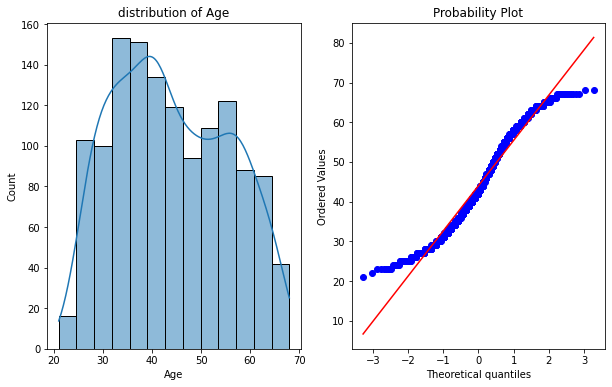

In [66]:
plot_data(data2,"Age")  # Plotting distribution of Age

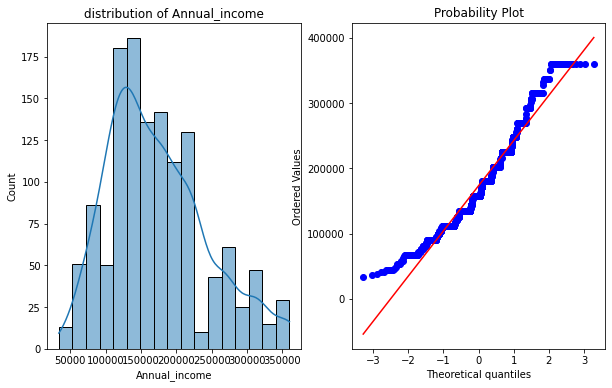

In [67]:
plot_data(data2,"Annual_income")   # Plotting distribution of Annual_income

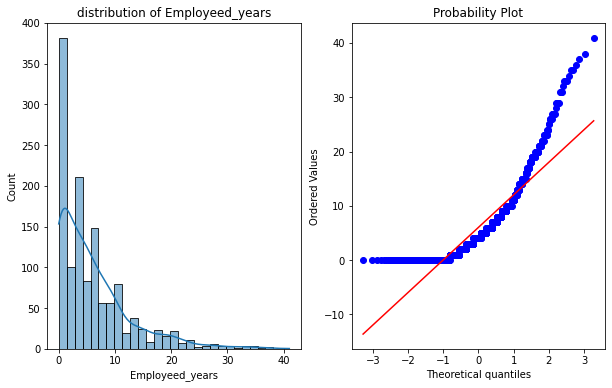

In [68]:
plot_data(data2,"Employeed_years")   # Plotting distribution of Employeed_years

Observations:
1. All the columns are not normally distributed.
2. Employeed_years column has some zero values.

Conclusion:
1. We need to transform Age, Annual_income and Employeed_years columns.
2. We cannot use log and box-cox transformation in Employeed_years column(since the column contains zero. We need to perform some other techniques in this column.

## log transformation

In [69]:
for i in ["Annual_income","Age"]:
    data2["{}_log".format(i)] = np.log(data2[i])

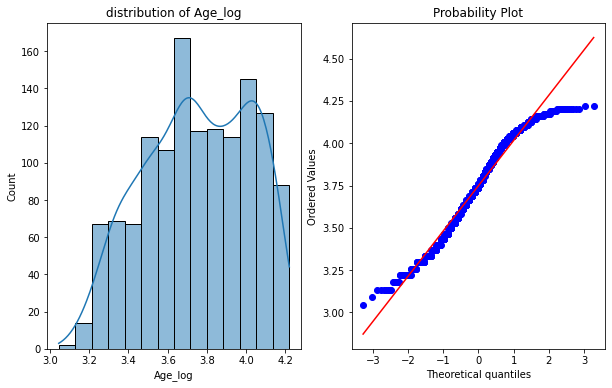

In [70]:
plot_data(data2,"Age_log")    # Plotting distribution of Age

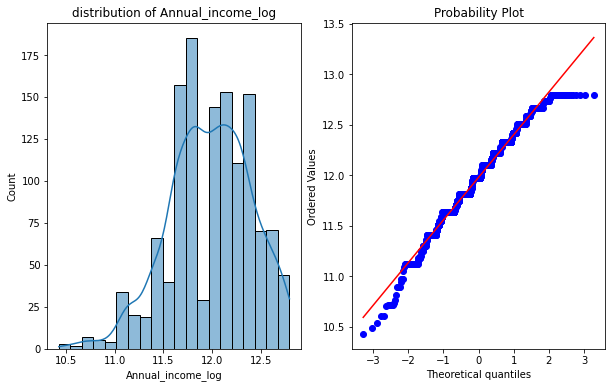

In [71]:
plot_data(data2,"Annual_income_log")    # Plotting distribution of Annual_income

## Box-Cox transformation

In [72]:
for i in ["Annual_income","Age"]:
  data2.insert(len(data2.columns), '{}_Boxcox'.format(i), 
              boxcox(data2[i])[0])

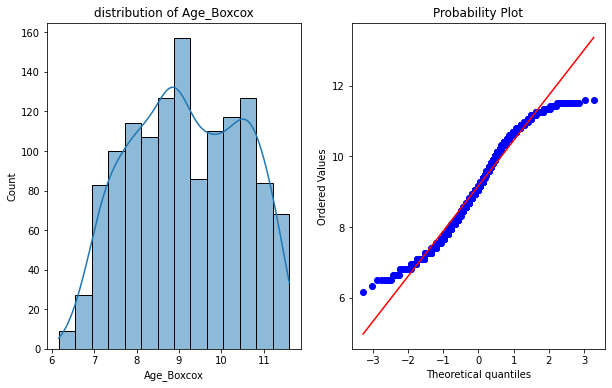

In [73]:
plot_data(data2,"Age_Boxcox")    # Plotting distribution of Age

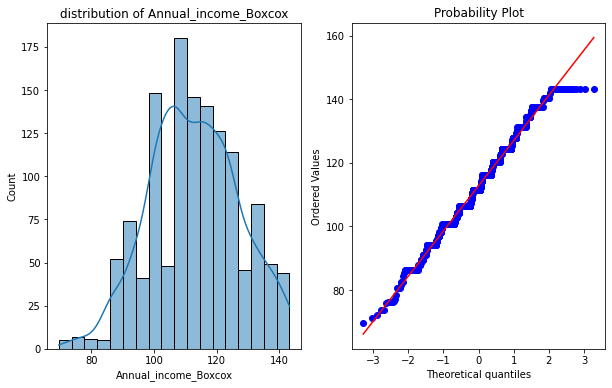

In [74]:
plot_data(data2,"Annual_income_Boxcox")    # Plotting distribution of Annual_income

## Square root transformation

In [75]:
cont_features = ["Age","Annual_income","Employeed_years"]

In [76]:
for i in cont_features:
  data2['{}_sqrt'.format(i)] = np.sqrt(data2[i])

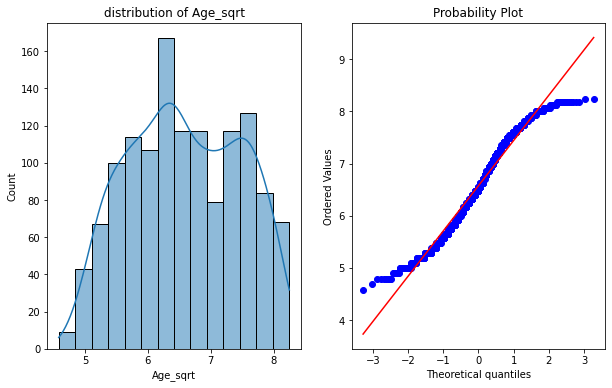

In [77]:
plot_data(data2,"Age_sqrt")    # Plotting distribution of Age

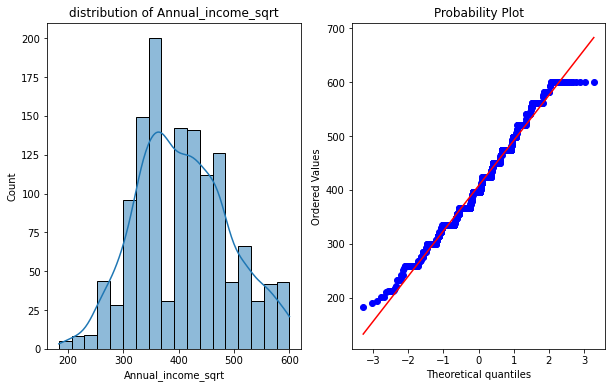

In [78]:
plot_data(data2,"Annual_income_sqrt")    # Plotting distribution of Annual_income

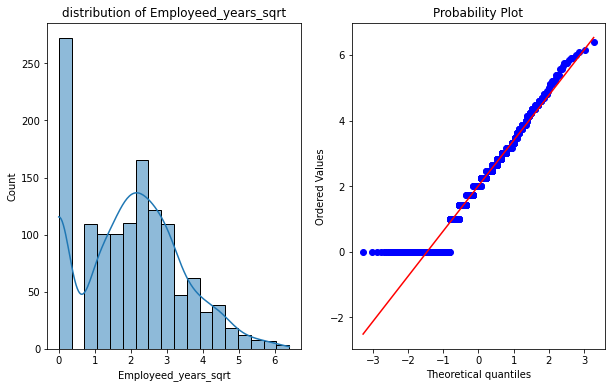

In [79]:
plot_data(data2,"Employeed_years_sqrt")    # Plotting distribution of Employeed_years

## Exponential transformation

In [80]:
for i in cont_features:
  data2['{}_ex'.format(i)]=data2[i]**(1/1.2)

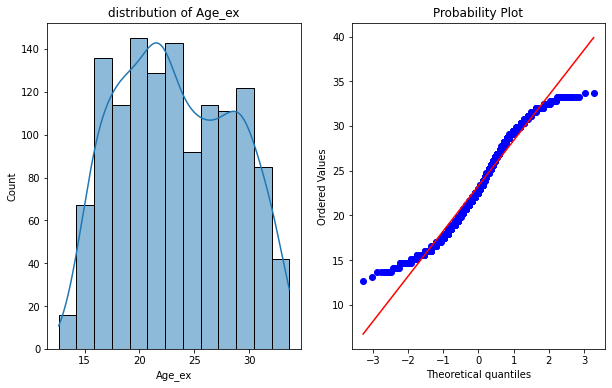

In [81]:
plot_data(data2,"Age_ex") # Plotting distribution of Age

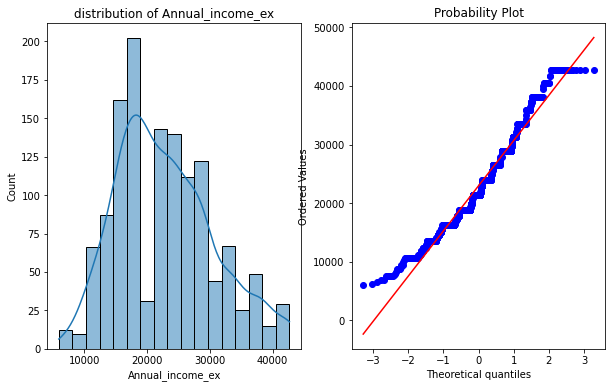

In [82]:
plot_data(data2,"Annual_income_ex") # Plotting distribution of Annual_income

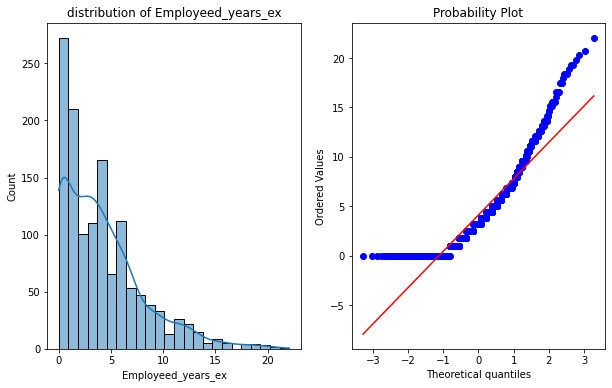

In [83]:
plot_data(data2,"Employeed_years_ex")    # Plotting distribution of Employeed_years

Observations:

1. Best transformation for Annual_income column is Box-cox transformation but it is not normally distributed also.
2. We cannot convert the Employeed_years column to normal distribution as it has many zeros. 
3. None of column can be converted to a normal distribution.

conclusions:
1. We are going to use the original columns and in feature selection we need to perform some nonparametric feature selection methods that do not require the assumption of normality. 



In [84]:
data2=data2.drop(["Annual_income_Boxcox","Annual_income_log","Annual_income_sqrt"
                  ,"Employeed_years_sqrt","Annual_income_ex","Employeed_years_ex",
                  "Age_log","Age_Boxcox","Age_sqrt","Age_ex"],axis = 1)   # Dropping the unnecessary columns

In [85]:
data2.head()   # Showing first 5 rows

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  Marital_status  \
0  5008827         0       180000.0            0          5               0   
1  5009744         0       315000.0            1          5               0   
2  5009746         0       315000.0            1          5               0   
3  5009749         0       195300.0            1          5               0   
7  5009894         0       180000.0            0          2               0   

   Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  \
0             0             1           0      0         0               2   
1             0             1           1      1         0               2   
2             0             1           1      1         0               2   
3             0             1           1      1         0               2   
7             0             1           0      0         0               2   

   label   Age  Employeed_years  GENDER_F  Car_Owner_Y  Propert_Owner_Y  
0      1  51.0                0         0            1                1  
1      1  37.0                2         1            1                0  
2      1  41.0                2         1            1                0  
3      1  37.0                2         1            1                0  
7      1  61.0                0         1            0                0

# **Dealing with imbalanced data**

In [86]:
data2["label"].value_counts()

0    1197
1     119
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

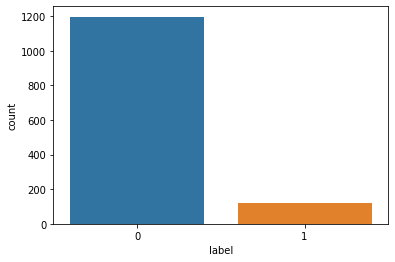

In [87]:
sns.countplot(data=data2, x='label')

There is a huge imbalance in the dataset. We are going to perform SMOTE oversampling technique to deal with this.

In [88]:
X = data2.drop("label",axis=1)  # Feature matrix
y = data2["label"]   # Target variable

In [89]:
y.value_counts()   # value counts of y before oversampling

0    1197
1     119
Name: label, dtype: int64

In [90]:
smote = SMOTE(sampling_strategy="minority",random_state=0)
X,y = smote.fit_resample(X, y)

In [91]:
y.value_counts()   # value counts of y after oversampling

1    1197
0    1197
Name: label, dtype: int64

#**Feature Selection**

Ind_ID column is not relevent so we can drop that.

In [92]:
X=X.drop(columns=["Ind_ID"],axis=1)   # Dropping the Ind_ID column

In [93]:
X.head()   # Showing first 5 rows

CHILDREN  Annual_income  Type_Income  EDUCATION  Marital_status  \
0         0       180000.0            0          5               0   
1         0       315000.0            1          5               0   
2         0       315000.0            1          5               0   
3         0       195300.0            1          5               0   
4         0       180000.0            0          2               0   

   Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  \
0             0             1           0      0         0               2   
1             0             1           1      1         0               2   
2             0             1           1      1         0               2   
3             0             1           1      1         0               2   
4             0             1           0      0         0               2   

    Age  Employeed_years  GENDER_F  Car_Owner_Y  Propert_Owner_Y  
0  51.0                0         0            1                1  
1  37.0                2         1            1                0  
2  41.0                2         1            1                0  
3  37.0                2         1            1                0  
4  61.0                0         1            0                0

## Dropping Constant Features

Here we are going to check the variance of all the features. We will set the threshold = 0 that means we will going to check the constant featues. If there is(are) any constant feature(s) then we are going to remove that feature(s).

In [94]:
var_thres=VarianceThreshold(threshold=0)   # Setting the threshold value eqaus to zero
var_thres.fit(X)   # Fitting the dataset

VarianceThreshold(threshold=0)

In [95]:
X.columns[var_thres.get_support()]   # All the columns are not having zero variance are shown 

Index(['CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'Age', 'Employeed_years', 'GENDER_F', 'Car_Owner_Y',
       'Propert_Owner_Y'],
      dtype='object')

In [96]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]   # Creating a list and appending all the columns with zero variance

print(constant_columns)   # Printing the columns

['Mobile_phone']


Observations:
1. Mobile_phone is the only constant feature. 

Conclusion:
1. We are going to remove the column.

In [97]:
X=X.drop(constant_columns,axis=1)   # Dropping Mobile_phone column

Now to perform several tests for feature selection process we need to split the dataset into training and testing datasets to avoid overfitting issue.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(     # Splitting the dataset into Training and Test dataset and setting the size of the test dataset = 25% of the original dataset
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((1795, 15), (599, 15))

## Spearman's rank correlation test

To see the multicollinearity between the continuous features we will use Spearman's rank Correlation(as the features are nor normally distributed).

In [99]:
continuous_features = ["Employeed_years","Annual_income","Age"]   # list of all the continuous features

<Axes: >

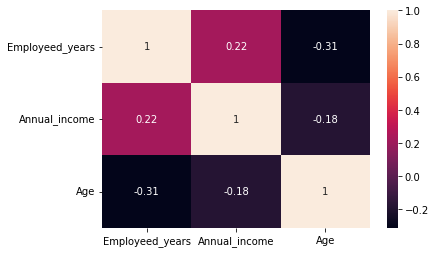

In [100]:
sns.heatmap(X_train[continuous_features].corr(method='spearman'),annot = True)

We can see there is no dependency between the continuous features.

In [101]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:   # we are interested in absolute coefficient value
                colname = corr_matrix.columns[i]   # getting the name of column
                col_corr.add(colname)   # adding the column name in the set
    return col_corr   # returning the set

In [102]:
corr_features = correlation(X_train[continuous_features], 0.8)   # Setting the threshold value = 0.8
corr_features

set()

The set is empty because there are no such features with more than 0.8 correlation coefficient.

As the continous features are not normally distributed that is why we cannot perform t test as is requires normality assumption. We need to perform some not parametric test such as Mann-Whitney U test.

## Mann-Whitney U test

In [103]:
selected_features = []   # In this empty list we are going to append the important features
p_val_dict = {}   # In this dictionary we will add the features as key and p values as value
for feature in continuous_features:
    group1 = X_train[y_train == 0][feature]
    group2 = X_train[y_train == 1][feature]
    _, pvalue = ranksums(group1, group2)
    p_val_dict[feature] = pvalue
    if pvalue < 0.05:
        selected_features.append(feature)
        p_val_dict[feature] = pvalue

print(p_val_dict)   # printing the features with their respective p values

{'Employeed_years': 4.62771232516947e-06, 'Annual_income': 0.003947998847092766, 'Age': 6.340533010300496e-08}


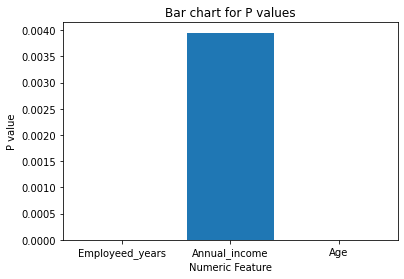

In [104]:
plt.bar(list(p_val_dict.keys()),list(p_val_dict.values()))   # Creating a bar plot for better visualization
plt.title('Bar chart for P values')
plt.xlabel('Numeric Feature')
plt.ylabel('P value')
plt.show()

In [105]:
print(selected_features)

['Employeed_years', 'Annual_income', 'Age']


In [106]:
Not_selected_features=[]   # Creating an empty list where the name of the columns will be appended which are not selected
for i in continuous_features:
  if i not in selected_features:
    Not_selected_features.append(i)
print(Not_selected_features)   # Printing the column names

[]


We can see here that none of the p values are greater than 0.05. We need to reject the null hypothesis(there is no relation between features and label).

In [107]:
data2.head()

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION  Marital_status  \
0  5008827         0       180000.0            0          5               0   
1  5009744         0       315000.0            1          5               0   
2  5009746         0       315000.0            1          5               0   
3  5009749         0       195300.0            1          5               0   
7  5009894         0       180000.0            0          2               0   

   Housing_type  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Family_Members  \
0             0             1           0      0         0               2   
1             0             1           1      1         0               2   
2             0             1           1      1         0               2   
3             0             1           1      1         0               2   
7             0             1           0      0         0               2   

   label   Age  Employeed_years  GENDER_F  Car_Owner_Y  Propert_Owner_Y  
0      1  51.0                0         0            1                1  
1      1  37.0                2         1            1                0  
2      1  41.0                2         1            1                0  
3      1  37.0                2         1            1                0  
7      1  61.0                0         1            0                0

In [108]:
X_train.shape,X_test.shape   # shape of the data

((1795, 15), (599, 15))

## Chi Squared Test

In [109]:
contingency_table = pd.crosstab(X_train["CHILDREN"],X_train["Family_Members"])

# perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print('p-value: {:.4f}'.format(p_val))   # Printing the p value


p-value: 0.0000


We can see that the p value is zero so there is very much dependency in these two colums. We need to drop one of those.

In [110]:
X_train = X_train.drop(["CHILDREN"],axis = 1)
X_test = X_test.drop(["CHILDREN"],axis = 1)

In [111]:
data2.shape

(1316, 18)

In [112]:
categorical_features = ['Family_Members','Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID',
        'GENDER_F', 'Car_Owner_Y', 'Propert_Owner_Y']   # lists of all categorical features

One thing to notice here is that CHILDREN and family_Members columns are having only five and six values respectively. So we can consider these columns as categorical feature for chi squared test.

In [113]:
p_values = chi2(X_train[categorical_features],y_train)[1]   # Obtain p-values for each feature

In [114]:
p_values=pd.Series(p_values)   # Changing the array into a pandas series

In [115]:
p_values.index=X_train[categorical_features].columns   # Setting the index as the column names
p_values.sort_values(ascending = True)   # Sorting the values in ascending order

Type_Income        1.455226e-25
Car_Owner_Y        1.022167e-21
Work_Phone         7.432237e-19
GENDER_F           3.417729e-16
Phone              1.292999e-15
Propert_Owner_Y    4.515985e-10
EMAIL_ID           2.561856e-09
Marital_status     1.308300e-06
Family_Members     7.312232e-06
Housing_type       1.103900e-03
EDUCATION          2.692880e-03
dtype: float64

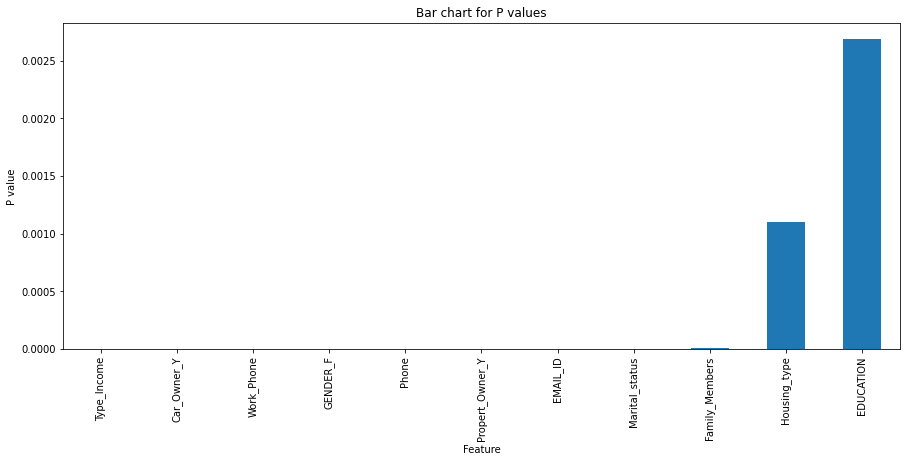

In [116]:
p_values.sort_values(ascending=True).plot.bar(figsize=(15, 6))   # Creating a bar plot for better visualization
plt.title('Bar chart for P values')
plt.xlabel('Feature')
plt.ylabel('P value')
plt.show()

We can see every feature has p value less than 0.05. So we need to regect the null hypothesis (there is no relation between features and label).

In [117]:
X_train.shape,X_test.shape   # shape of the dataset

((1795, 14), (599, 14))

In [118]:
X_train.head()   # Showing first 5 rows

Annual_income  Type_Income  EDUCATION  Marital_status  Housing_type  \
1010   67500.000000            3          2               2             0   
1478  180000.000000            1          2               0             0   
1325  135000.000000            1          1               1             1   
141   131400.000000            0          2               0             0   
1976  309141.773965            0          5               0             0   

      Work_Phone  Phone  EMAIL_ID  Family_Members        Age  Employeed_years  \
1010           0      0         0               3  49.000000                1   
1478           0      0         0               3  41.958059               18   
1325           0      0         0               3  35.600834                3   
141            0      0         0               2  65.000000                0   
1976           0      0         0               2  56.207312                1   

      GENDER_F  Car_Owner_Y  Propert_Owner_Y  
1010         1            0                1  
1478         0            0                0  
1325         1            0                1  
141          0            1                1  
1976         0            0                1

#**Feature Scaling**

In [119]:
continuous_features= ['Age', 'Employeed_years','Annual_income']   # list of all numeric features

# Perform feature scaling on training set
scaler = StandardScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Use the same scaler to scale the testing set
X_test[continuous_features] = scaler.transform(X_test[continuous_features])   # Using only transform to avoid data leakage

In [120]:
X_train.head()

Annual_income  Type_Income  EDUCATION  Marital_status  Housing_type  \
1010      -1.556203            3          2               2             0   
1478       0.163177            1          2               0             0   
1325      -0.524575            1          1               1             1   
141       -0.579595            0          2               0             0   
1976       2.136899            0          5               0             0   

      Work_Phone  Phone  EMAIL_ID  Family_Members       Age  Employeed_years  \
1010           0      0         0               3  0.384805        -0.724429   
1478           0      0         0               3 -0.261935         2.212850   
1325           0      0         0               3 -0.845790        -0.378867   
141            0      0         0               2  1.854263        -0.897211   
1976           0      0         0               2  1.046733        -0.724429   

      GENDER_F  Car_Owner_Y  Propert_Owner_Y  
1010         1            0                1  
1478         0            0                0  
1325         1            0                1  
141          0            1                1  
1976         0            0                1

In [121]:
X_test.head()

Annual_income  Type_Income  EDUCATION  Marital_status  Housing_type  \
2202      -1.572389            0          4               0             0   
391        1.194805            1          3               0             0   
1386       1.251388            1          3               0             0   
949       -0.868451            1          5               0             0   
1819      -0.768701            0          3               1             1   

      Work_Phone  Phone  EMAIL_ID  Family_Members       Age  Employeed_years  \
2202           0      0         0               2  1.219615        -0.897211   
391            0      0         1               5 -1.084653         0.139476   
1386           0      0         0               3 -0.403355        -0.551648   
949            1      1         0               2  0.292964        -0.378867   
1819           0      0         0               1  0.412150        -0.897211   

      GENDER_F  Car_Owner_Y  Propert_Owner_Y  
2202         0            0                1  
391          1            0                1  
1386         0            1                1  
949          1            0                1  
1819         0            0                0

# **Model training and validation:**

In [122]:
# Creating a Matrix to compare the accuracy of the models.
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([7,2]), columns=["Accuracy_Score(Train)","Accuracy_Score(Test)"])
Model_Evaluation_Comparison_Matrix

Accuracy_Score(Train)  Accuracy_Score(Test)
0                    0.0                   0.0
1                    0.0                   0.0
2                    0.0                   0.0
3                    0.0                   0.0
4                    0.0                   0.0
5                    0.0                   0.0
6                    0.0                   0.0

## Logictic Regression

In [123]:
# Creating a Logistic regression object
classifier_logistic_reg=LogisticRegression()

In [124]:
# Fitting independant and dependant training data to the model
classifier_logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [125]:
#Predicting the test set result  
y_pred_logistic= classifier_logistic_reg.predict(X_test)

In [126]:
y_pred_logistic

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [127]:
cm_log= confusion_matrix(y_test, y_pred_logistic) 
print(cm_log)
score_log=accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression training set accuracy: {format(classifier_logistic_reg.score(X_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set accuracy: {format(classifier_logistic_reg.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_logistic))

[[233  69]
 [ 72 225]]
Logistic Regression training set accuracy: 0.7526 
Logistic Regression testing set accuracy: 0.7646 
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       302
           1       0.77      0.76      0.76       297

    accuracy                           0.76       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.76      0.76      0.76       599



In [128]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[0,'Accuracy_Score(Train)']  = float(format(classifier_logistic_reg.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[0,'Accuracy_Score(Test)']   =float(format(classifier_logistic_reg.score(X_test, y_test), '.4f'))

## KNN

In [129]:
# Creating KKN object
classifier_KNN= KNeighborsClassifier()  

In [130]:
# Fitting independant and dependant training data to the model
classifier_KNN.fit(X_train, y_train) 

KNeighborsClassifier()

In [131]:
#Predicting the test set result  
y_pred_KNN= classifier_KNN.predict(X_test)

In [132]:
y_pred_KNN

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [133]:
cm_KNN= confusion_matrix(y_test, y_pred_KNN) 
print(cm_KNN)
score_KNN=accuracy_score(y_test, y_pred_KNN)
print(f"KNN training set accuracy: {format(classifier_KNN.score(X_train, y_train), '.4f')} ")
print(f"KNN testing set accuracy: {format(classifier_KNN.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_KNN))

[[241  61]
 [ 19 278]]
KNN training set accuracy: 0.8953 
KNN testing set accuracy: 0.8664 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       302
           1       0.82      0.94      0.87       297

    accuracy                           0.87       599
   macro avg       0.87      0.87      0.87       599
weighted avg       0.87      0.87      0.87       599



In [134]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[1,'Accuracy_Score(Train)']  = float(format(classifier_KNN.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[1,'Accuracy_Score(Test)']   =float(format(classifier_KNN.score(X_test, y_test), '.4f'))

## Decision Tree 


In [135]:
# Creating Decision Tree object
classifier_DT = DecisionTreeClassifier()

In [136]:
# Fitting independant and dependant training data to the model
classifier_DT.fit(X_train, y_train) 

DecisionTreeClassifier()

In [137]:
#Predicting the test set result  
y_pred_DT= classifier_DT.predict(X_test)

In [138]:
y_pred_DT

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [139]:
cm_DT= confusion_matrix(y_test, y_pred_DT) 
print(cm_DT)
score_DT=accuracy_score(y_test, y_pred_DT)
print(f"Decision Tree training set accuracy: {format(classifier_DT.score(X_train, y_train), '.4f')} ")
print(f"Decision Tree testing set accuracy: {format(classifier_DT.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_DT))

[[246  56]
 [ 22 275]]
Decision Tree training set accuracy: 0.9989 
Decision Tree testing set accuracy: 0.8698 
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       302
           1       0.83      0.93      0.88       297

    accuracy                           0.87       599
   macro avg       0.87      0.87      0.87       599
weighted avg       0.87      0.87      0.87       599



In [140]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[2,'Accuracy_Score(Train)']  = float(format(classifier_DT.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[2,'Accuracy_Score(Test)']   =float(format(classifier_DT.score(X_test, y_test), '.4f'))

## Random Forest 

In [141]:
# Creating Random Forest object
classifier_RF= RandomForestClassifier(random_state = 0)  

In [142]:
# Fitting independant and dependant training data to the model
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [143]:
#Predicting the test set result  
y_pred_RF= classifier_RF.predict(X_test) 

In [144]:
y_pred_RF

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [145]:
cm_RF= confusion_matrix(y_test, y_pred_RF) 
print(cm_RF)
score_RF=accuracy_score(y_test, y_pred_RF)
print(f"Random Forest training set accuracy: {format(classifier_RF.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier_RF.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_RF))

[[274  28]
 [ 17 280]]
Random Forest training set accuracy: 0.9989 
Random Forest testing set accuracy: 0.9249 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       302
           1       0.91      0.94      0.93       297

    accuracy                           0.92       599
   macro avg       0.93      0.93      0.92       599
weighted avg       0.93      0.92      0.92       599



In [146]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[3,'Accuracy_Score(Train)']  = float(format(classifier_RF.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[3,'Accuracy_Score(Test)']   =float(format(classifier_RF.score(X_test, y_test), '.4f'))

## Support Vector Machine

In [147]:
# Creating SVM object
classifier_SVM = svm.SVC(random_state = 0)

In [148]:
# Fitting independant and dependant training data to the model
classifier_SVM.fit(X_train, y_train)

SVC(random_state=0)

In [149]:
#Predicting the test set result  
y_pred_SVM= classifier_SVM.predict(X_test) 

In [150]:
y_pred_SVM

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [151]:
cm_SVM= confusion_matrix(y_test, y_pred_SVM) 
print(cm_SVM)
score_SVM=accuracy_score(y_test, y_pred_SVM)
print(f"SVM training set accuracy: {format(classifier_SVM.score(X_train, y_train), '.4f')} ")
print(f"SVM testing set accuracy: {format(classifier_SVM.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_SVM))

[[247  55]
 [ 41 256]]
SVM training set accuracy: 0.8496 
SVM testing set accuracy: 0.8397 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       302
           1       0.82      0.86      0.84       297

    accuracy                           0.84       599
   macro avg       0.84      0.84      0.84       599
weighted avg       0.84      0.84      0.84       599



In [152]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[4,'Accuracy_Score(Train)']  = float(format(classifier_SVM.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[4,'Accuracy_Score(Test)']   =float(format(classifier_SVM.score(X_test, y_test), '.4f'))

## XGBoost


In [153]:
# Creating XG Boost object
classifier_XGB = XGBClassifier()

In [154]:
# Fitting independant and dependant training data to the model
classifier_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [155]:
#Predicting the test set result  
y_pred_XGB= classifier_XGB.predict(X_test)

In [156]:
y_pred_XGB

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [157]:
cm_XGB= confusion_matrix(y_test, y_pred_XGB) 
print(cm_XGB)
score_XGB=accuracy_score(y_test, y_pred_XGB)
print(f"XG Boost training set accuracy: {format(classifier_XGB.score(X_train, y_train), '.4f')} ")
print(f"XG Boost testing set accuracy: {format(classifier_XGB.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_XGB))

[[272  30]
 [ 19 278]]
XG Boost training set accuracy: 0.9972 
XG Boost testing set accuracy: 0.9182 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       302
           1       0.90      0.94      0.92       297

    accuracy                           0.92       599
   macro avg       0.92      0.92      0.92       599
weighted avg       0.92      0.92      0.92       599



In [158]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[5,'Accuracy_Score(Train)']  = float(format(classifier_XGB.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[5,'Accuracy_Score(Test)']   =float(format(classifier_XGB.score(X_test, y_test), '.4f'))

## Naive Bayes

In [159]:
# Train a Naive Bayes model using Gaussian distribution
classifier_NB = GaussianNB()

In [160]:
# Fitting independant and dependant training data to the model
classifier_NB.fit(X_train,y_train)

GaussianNB()

In [161]:
#Predicting the test set result  
y_pred_NB= classifier_NB.predict(X_test)

In [162]:
y_pred_NB

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [163]:
cm_NB= confusion_matrix(y_test, y_pred_NB) 
print(cm_NB)
score_NB=accuracy_score(y_test, y_pred_NB)
print(f"Naive Bayes training set accuracy: {format(classifier_NB.score(X_train, y_train), '.4f')} ")
print(f"Naive Bayes testing set accuracy: {format(classifier_NB.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_NB))

[[178 124]
 [ 42 255]]
Naive Bayes training set accuracy: 0.7153 
Naive Bayes testing set accuracy: 0.7229 
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       302
           1       0.67      0.86      0.75       297

    accuracy                           0.72       599
   macro avg       0.74      0.72      0.72       599
weighted avg       0.74      0.72      0.72       599



In [164]:
# Setting the accuracy scores in the matrix
Model_Evaluation_Comparison_Matrix.loc[6,'Accuracy_Score(Train)']  = float(format(classifier_NB.score(X_train, y_train), '.4f'))
Model_Evaluation_Comparison_Matrix.loc[6,'Accuracy_Score(Test)']   =float(format(classifier_NB.score(X_test, y_test), '.4f'))

#**Model Evaluation**

## AUC-ROC curve 

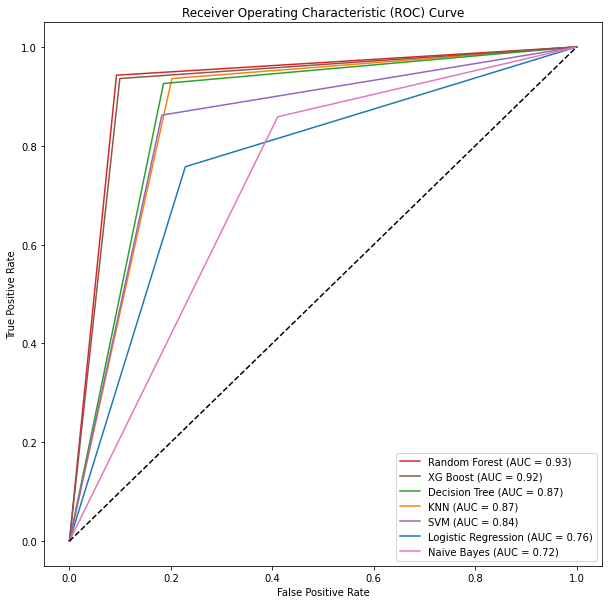

In [165]:
# Compute false positive rate, true positive rate, and threshold for each model
fpr_log, tpr_log, threshold_log = roc_curve(y_test, y_pred_logistic)
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_test, y_pred_KNN)
fpr_DT, tpr_DT, threshold_DT = roc_curve(y_test, y_pred_DT)
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, y_pred_RF)
fpr_SVM, tpr_SVM, threshold_SVM = roc_curve(y_test, y_pred_SVM)
fpr_XGB, tpr_XGB, threshold_XGB = roc_curve(y_test, y_pred_XGB)
fpr_NB, tpr_NB, threshold_NB = roc_curve(y_test, y_pred_NB)
# Compute AUC score for each model
auc_log = auc(fpr_log, tpr_log)
auc_KNN = auc(fpr_KNN, tpr_KNN)
auc_DT = auc(fpr_DT, tpr_DT)
auc_RF = auc(fpr_RF, tpr_RF)
auc_SVM = auc(fpr_SVM, tpr_SVM)
auc_XGB = auc(fpr_XGB, tpr_XGB)
auc_NB = auc(fpr_NB, tpr_NB)
# Plot ROC curves for each model

plt.figure(figsize=(10,10))

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % auc_log)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = %0.2f)' % auc_KNN)
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = %0.2f)' % auc_DT)
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = %0.2f)' % auc_RF)
plt.plot(fpr_SVM, tpr_SVM, label='SVM (AUC = %0.2f)' % auc_SVM)
plt.plot(fpr_XGB, tpr_XGB, label='XG Boost (AUC = %0.2f)' % auc_XGB)
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes (AUC = %0.2f)' % auc_NB)


# Plot random line for comparison
plt.plot([0, 1], [0, 1],'k--')

# Add labels, title, and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
# add legend in descending order based on AUC scores
handles, labels = plt.gca().get_legend_handles_labels()
order = np.argsort([auc_log, auc_KNN, auc_DT,auc_RF,auc_SVM,auc_XGB,auc_NB])[::-1]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])


plt.show()


We can see that the Random Forest is having the highest AUC value (0.93).

## Accuracy Scores

In [166]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Logistic Regression','KNN','Decision Tree','Random Forest',
             'SVM','XGBoost','Naive Bayes']
EMC

Accuracy_Score(Train)  Accuracy_Score(Test)
Logistic Regression                 0.7526                0.7646
KNN                                 0.8953                0.8664
Decision Tree                       0.9989                0.8698
Random Forest                       0.9989                0.9249
SVM                                 0.8496                0.8397
XGBoost                             0.9972                0.9182
Naive Bayes                         0.7153                0.7229

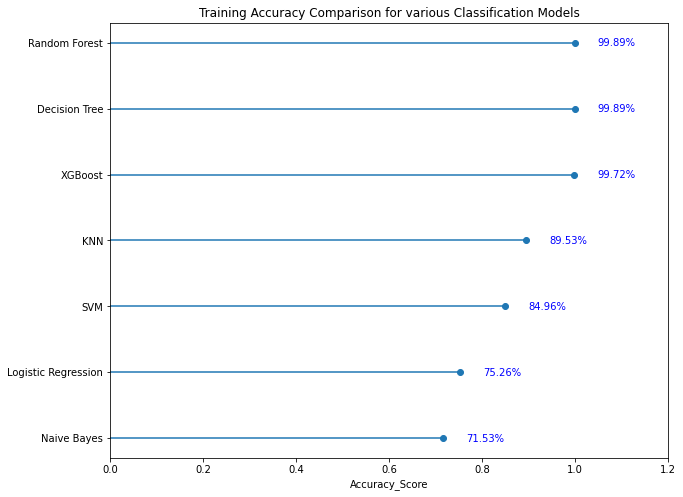

In [167]:
plt.figure(figsize=(10,8))

acc_train= EMC['Accuracy_Score(Train)'].sort_values(ascending=True)
plt.hlines(y=acc_train.index, xmin=0, xmax=acc_train.values)
plt.plot(acc_train.values, acc_train.index,'o')
plt.title('Training Accuracy Comparison for various Classification Models')
plt.xlabel('Accuracy_Score')

for i, v in enumerate(acc_train):
    plt.text(v+0.05, i-0.05, str(round(v*100,2))+"%", color='blue')
plt.xlim([0,1.2])
plt.show()

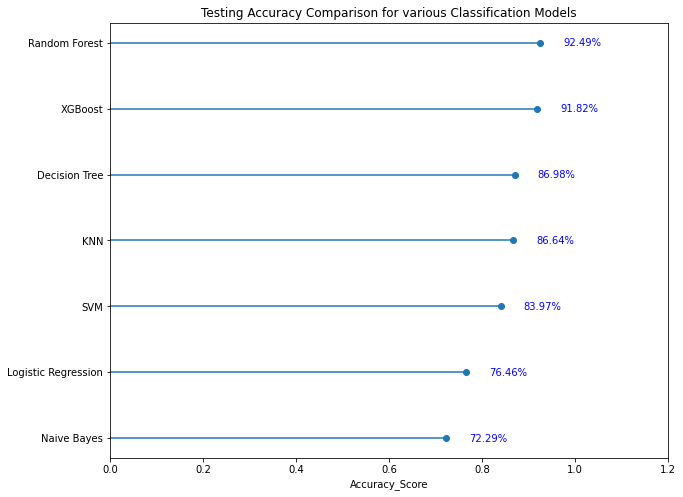

In [168]:
plt.figure(figsize=(10,8))

acc_test= EMC['Accuracy_Score(Test)'].sort_values(ascending=True)
plt.hlines(y=acc_test.index, xmin=0, xmax=acc_test.values)
plt.plot(acc_test.values, acc_test.index,'o')
plt.title('Testing Accuracy Comparison for various Classification Models')
plt.xlabel('Accuracy_Score')

for i, v in enumerate(acc_test):
    plt.text(v+0.05, i-0.05, str(round(v*100,2))+"%", color='blue')
plt.xlim([0,1.2])
plt.show()

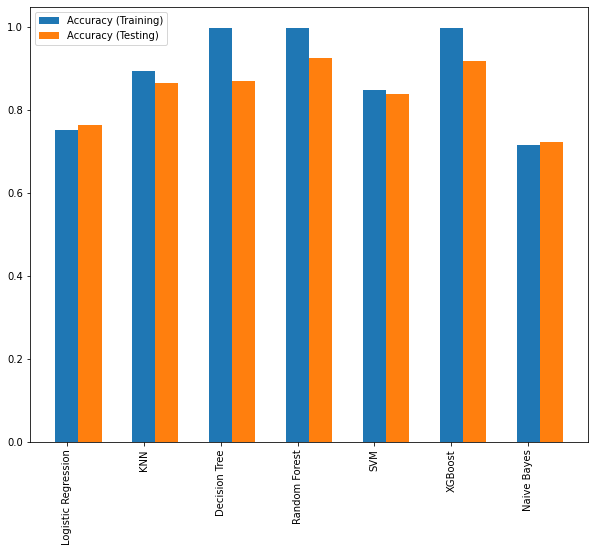

In [169]:
plt.figure(figsize=(10,8))
cc = Model_Evaluation_Comparison_Matrix.columns.values
plt.bar(np.arange(7), Model_Evaluation_Comparison_Matrix[cc[0]].values, width=0.3, label='Accuracy (Training)')
plt.bar(np.arange(7)+0.3, Model_Evaluation_Comparison_Matrix[cc[1]].values, width=0.3, label='Accuracy (Testing)')
plt.xticks(np.arange(7),EMC.index, rotation =90)
plt.legend()

plt.show()

Observations:

1. Random Forest, XGBoost, Decision tree have the highest accuracy score in the training dataset of 99.89%. But in the test dataset these models have 93%, 91%, 86% accuracy respectively, which is because of overfitting.

2. KNN is having Accuracy of 89% and 86% in training and testing datasets respectively. It is possible that the KNN model is overfitted since the difference between the training and testing accuracy scores is significant.

3. SVM, Naive Bayes, and Logistic Regression have less difference between the accuracy of training and testing data. Among these three models SVM has higher accuracy in both training and testing dataset.

## Cross Validation

In [170]:
# Perform 5-fold cross-validation on the training set for both models
cv_scores_log = cross_val_score(classifier_logistic_reg, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_KNN = cross_val_score(classifier_KNN, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_DT = cross_val_score(classifier_DT, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_RF = cross_val_score(classifier_RF, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_SVM = cross_val_score(classifier_SVM, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_XGB = cross_val_score(classifier_XGB, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_NB = cross_val_score(classifier_NB, X_train, y_train, cv=5, scoring='accuracy')


# Print the mean scores for both models
print("Logistic Regression mean score:", cv_scores_log.mean())
print("KNN mean score:", cv_scores_KNN.mean())
print("Decision Tree mean score:", cv_scores_DT.mean())
print("Random Forest mean score:", cv_scores_RF.mean())
print("SVM mean score:", cv_scores_SVM.mean())
print("XGBoost mean score:", cv_scores_XGB.mean())
print("Naive Bayes mean score:", cv_scores_NB.mean())


Logistic Regression mean score: 0.7442896935933148
KNN mean score: 0.8350974930362117
Decision Tree mean score: 0.8323119777158775
Random Forest mean score: 0.8980501392757662
SVM mean score: 0.8155988857938719
XGBoost mean score: 0.9080779944289693
Naive Bayes mean score: 0.7147632311977715


Random Forest is having the highest Cross Validation Score with 0.9070 followed by XGBoost with 0.9031.

Based on all the model evaluation techniques we can say that Random Forest is the best model for our project.

Now we are going to use hyperparameter tuning to improve the performance of the model.

## Hyperparameter Tuning

In this section we are going to do hyperparameter tuning for every models.

### Random Forest

In [171]:
param_grid_RF = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'max_leaf_nodes': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid = GridSearchCV(classifier_RF, param_grid_RF, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.721 total time=   0.1s
[CV 2/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.749 total time=   0.1s
[CV 3/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.735 total time=   0.1s
[CV 4/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.744 total time=   0.1s
[CV 5/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.721 total time=   0.1s
[CV 1/5] END max_depth=None, max_features=sqrt, max_leaf_nodes=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.702 total time=   0.3s


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 6, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [172]:
# print best parameter after tuning
print(grid.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [220]:
# Creating Random Forest object
classifier_RF_tuned= RandomForestClassifier(max_depth = None, max_features = "sqrt", max_leaf_nodes = 9,
                                            min_samples_leaf = 2,min_samples_split = 2,n_estimators = 50)

In [221]:
# Fitting independant and dependant training data to the model
classifier_RF_tuned.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=9, min_samples_leaf=2, n_estimators=50)

In [222]:
#Predicting the test set result  
y_pred_RF_tuned= classifier_RF_tuned.predict(X_test) 

In [223]:
y_pred_RF_tuned

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [224]:
cm_RF_tuned= confusion_matrix(y_test, y_pred_RF_tuned) 
print(cm_RF_tuned)
score_RF_tuned=accuracy_score(y_test, y_pred_RF_tuned)
print(f"Random Forest training set accuracy: {format(classifier_RF_tuned.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier_RF_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_RF_tuned))

[[252  50]
 [ 66 231]]
Random Forest training set accuracy: 0.8061 
Random Forest testing set accuracy: 0.8063 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       302
           1       0.82      0.78      0.80       297

    accuracy                           0.81       599
   macro avg       0.81      0.81      0.81       599
weighted avg       0.81      0.81      0.81       599



We can see that after hyperparameter tuning the accuracy of the model is decresed. That means the model is overfitted.

Let us try hyperparameter tuning on SVM.

### Support Vector Machine

In [178]:
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}


grid = GridSearchCV(classifier_SVM, param_grid_SVM, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.710 total time=   0.1s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.808 total time=   0.1s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.738 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.769 total time=   0.2s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.730 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.730 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.797 total time=   0.2s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.816 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.783 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.763 total time=   0.1s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.588 total time=   0.2s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [179]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [180]:
# Creating SVM object
classifier_SVM_tuned = svm.SVC(C = 10, gamma = 1, kernel = "rbf")

In [181]:
# Fitting independant and dependant training data to the model
classifier_SVM_tuned.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [182]:
#Predicting the test set result  
y_pred_SVM_tuned= classifier_SVM_tuned.predict(X_test) 

In [183]:
y_pred_SVM_tuned

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [184]:
cm_SVM_tuned= confusion_matrix(y_test, y_pred_SVM_tuned) 
print(cm_SVM_tuned)
score_SVM=accuracy_score(y_test, y_pred_SVM_tuned)
print(f"SVM training set accuracy: {format(classifier_SVM_tuned.score(X_train, y_train), '.4f')} ")
print(f"SVM testing set accuracy: {format(classifier_SVM_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_SVM_tuned))

[[277  25]
 [ 34 263]]
SVM training set accuracy: 0.9916 
SVM testing set accuracy: 0.9015 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       302
           1       0.91      0.89      0.90       297

    accuracy                           0.90       599
   macro avg       0.90      0.90      0.90       599
weighted avg       0.90      0.90      0.90       599



After hyperparameter tuning, the SVM model is overfitted.

Let us do hyperparameter tuning on XGBoost.

### XGBoost

In [185]:
param_grid_XGB = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 2]
}


grid = GridSearchCV(classifier_XGB, param_grid_XGB, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV 1/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6;, score=0.747 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6;, score=0.813 total time=   0.1s
[CV 3/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6;, score=0.794 total time=   0.1s
[CV 4/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6;, score=0.774 total time=   0.1s
[CV 5/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6;, score=0.758 total time=   0.1s
[CV 1/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=0.749 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estim

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=3)

In [186]:
# print best parameter after tuning
print(grid.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}


In [225]:
# Creating XG Boost object
classifier_XGB_tuned = XGBClassifier(colsample_bytree = 0.6, gamma = 0, learinig_rate = 0.1, max_depth = 7, 
                               n_estimators = 150,subsample = 0.8)

In [226]:
# Fitting independant and dependant training data to the model
classifier_XGB_tuned.fit(X_train,y_train)

[16:21:30] WARNING: ../src/learner.cc:767: 
Parameters: { "learinig_rate" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learinig_rate=0.1,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [227]:
#Predicting the test set result  
y_pred_XGB_tuned= classifier_XGB_tuned.predict(X_test)

In [228]:
y_pred_XGB_tuned

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [229]:
cm_XGB_tuned= confusion_matrix(y_test, y_pred_XGB_tuned) 
print(cm_XGB_tuned)
score_XGB=accuracy_score(y_test, y_pred_XGB_tuned)
print(f"XG Boost training set accuracy: {format(classifier_XGB_tuned.score(X_train, y_train), '.4f')} ")
print(f"XG Boost testing set accuracy: {format(classifier_XGB_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_XGB_tuned))

[[269  33]
 [ 17 280]]
XG Boost training set accuracy: 0.9989 
XG Boost testing set accuracy: 0.9165 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       302
           1       0.89      0.94      0.92       297

    accuracy                           0.92       599
   macro avg       0.92      0.92      0.92       599
weighted avg       0.92      0.92      0.92       599



XGBoost is also overfitted.

### KNN

In [192]:
param_grid_KNN = {'n_neighbors': list(range(1, 21)),
              'weights': ['uniform', 'distance']}

grid = GridSearchCV(classifier_KNN, param_grid_KNN, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.877 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.858 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.844 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.861 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.852 total time=   0.0s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.877 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.858 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.844 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.861 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.852 total time=   0.0s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.875 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [193]:
# print best parameter after tuning
print(grid.best_params_)

{'n_neighbors': 1, 'weights': 'uniform'}


In [194]:
# Creating KKN object
classifier_KNN_tuned= KNeighborsClassifier(n_neighbors = 1, weights = "uniform") 

In [195]:
# Fitting independant and dependant training data to the model
classifier_KNN_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [196]:
#Predicting the test set result  
y_pred_KNN_tuned= classifier_KNN_tuned.predict(X_test)

In [197]:
y_pred_KNN_tuned

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [198]:
cm_KNN_tuned= confusion_matrix(y_test, y_pred_KNN_tuned) 
print(cm_KNN_tuned)
score_KNN=accuracy_score(y_test, y_pred_KNN_tuned)
print(f"KNN training set accuracy: {format(classifier_KNN_tuned.score(X_train, y_train), '.4f')} ")
print(f"KNN testing set accuracy: {format(classifier_KNN_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_KNN_tuned))

[[239  63]
 [ 15 282]]
KNN training set accuracy: 0.9989 
KNN testing set accuracy: 0.8698 
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       302
           1       0.82      0.95      0.88       297

    accuracy                           0.87       599
   macro avg       0.88      0.87      0.87       599
weighted avg       0.88      0.87      0.87       599



KNN is overfitted the model after hyperparameter tuning.

### Decision Tree

In [199]:
param_grid_DT = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 4, 6, 8]}

grid = GridSearchCV(classifier_DT, param_grid_DT, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.624 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.666 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.646 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.713 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.671 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.624 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.666 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.646 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=4;, score=0.713 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=3)

In [200]:
# print best parameter after tuning
print(grid.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [230]:
# Creating Decision Tree object
classifier_DT_tuned = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 1, min_samples_split = 2)

In [231]:
# Fitting independant and dependant training data to the model
classifier_DT_tuned.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=10)

In [232]:
#Predicting the test set result  
y_pred_DT_tuned= classifier_DT_tuned.predict(X_test)

In [233]:
y_pred_DT_tuned

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [234]:
cm_DT_tuned= confusion_matrix(y_test, y_pred_DT_tuned) 
print(cm_DT_tuned)
score_DT=accuracy_score(y_test, y_pred_DT_tuned)
print(f"Decision Tree training set accuracy: {format(classifier_DT_tuned.score(X_train, y_train), '.4f')} ")
print(f"Decision Tree testing set accuracy: {format(classifier_DT_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_DT_tuned))

[[237  65]
 [ 59 238]]
Decision Tree training set accuracy: 0.9109 
Decision Tree testing set accuracy: 0.7930 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       302
           1       0.79      0.80      0.79       297

    accuracy                           0.79       599
   macro avg       0.79      0.79      0.79       599
weighted avg       0.79      0.79      0.79       599



Decision Tree has overfitted the model.

### Logistic Regression

In [206]:
param_grid_log ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.logspace(-4, 4, 20),
             'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
              'max_iter' : [100, 1000,2500, 5000]
    }

grid = GridSearchCV(classifier_logistic_reg, param_grid_log, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV 1/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan tota

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l1

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.749 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.733 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.749 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.691 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.518 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.532 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.529 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.515 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=l2, solver=sag;, score=0.685 total time=   0.0s
[CV 2/

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.0001, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.0001, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, pen

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0001, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0001, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, pena

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0001, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0001, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0001, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=l1, so

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solve

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.735 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.682 total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=sag

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=none

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.735 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.696 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=liblinear;, score=0.532 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=liblinear;, score=0.557 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=lib

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=liblinear

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga;, score=0.499 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 3/5] END C=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=sag;, score=nan total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.0006951927961775605, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=newton

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=l1, solver=saga;, score=0.501 total time=   0.0s
[CV 3/5] END C=0.0018329

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag;, score=0.7

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinear;, score=0.616 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinear;, score=0.649 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinear;, score=0.677 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinear;, score=0.643 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinea

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, sol

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=liblinear;, score=0.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga;, score=0.535 total time=   0.0s
[CV 2/5] END C=0.00

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=sag;, score=0.719 tot

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear;, score=0.499 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag;, score=nan total t

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=sag;, sco

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.724 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=liblinear;, score=0.657 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=liblinear;, score=0.699 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=l2, solver=liblinear;, score

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=libli

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=saga;, score=0.721 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=saga;, score=0.660 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs;, score=0.808 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=lbfgs;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 3/5] END 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=sag;, score=0.699 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.713 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear;, score=0.713 total

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=liblinear;,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=libline

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.2s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag;, score=0.7

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0335

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=saga;, score=0.713 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=saga;, score=0.741 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=saga;, score=0.702 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs;, score=0.691 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.0335981828628378

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.1s
[C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.0335981828

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=saga;, score=0.702 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.691 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.691 total time=   0.1s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.747 total time=   0.0s
[CV 4/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 tota

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear;, sc

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.741 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.749 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=saga;, score=0.713 total time=   0.0s
[CV 2/5] END C=0.03359818286

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=liblinear;, scor

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.1s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0885866790410

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=liblinear;, scor

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.724 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.727 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.755 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=liblinear;, score=0.713 total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=liblinear;, scor

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=liblinear;, scor

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.08858667904100823, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.233572146

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=liblinear;, score=nan t

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.233572146

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=liblinear;, scor

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.23357

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=newton-cg;, score=0.805 total time=   0.0s
[CV 3/5] END 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=liblinear;, sc

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.233

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga;, score=0.766 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.805 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=lbfgs;, score=0.724 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=newton-cg;, score=0.708 total time=   0.0s
[CV 2/5] END C=0.2

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=liblinear;, sc

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.23357214690901212, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, ma

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, m

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=liblinear;, score=0.705 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=liblinear;, score=0.772 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=liblinear;, score=0.730 total time=   0.1s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9

[CV 4/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear;, score=0.772 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1.623776739188721, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=100, 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=10

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear;, score=0.772 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9

[CV 4/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_it

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_i

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=liblinear;, score=nan total time

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear;, score=nan t

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=250

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=liblinear;, score=nan total

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.28837

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=11.28837891684688

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=11.288378916846883, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.1s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=29.7635144163131

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=sag;, score=0.699 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.1s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=29.763514

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=liblinear;, score=nan total t

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=29.763514416313132, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=100, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=100, penalty

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=78.47599703514607, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, ma

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.1s
[CV 4/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=78.47599703514607, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=100, penalty=l

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs;, score=0.699 total time=   0.2s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



[CV 4/5] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=206.913808111479, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.1s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.9138081114

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.1s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, pena

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.1s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.9

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=2500,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=liblinear;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.1s
[CV 4/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.1s
[CV 5/5] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.1s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, pen

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.1s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.1s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.1s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=206.913808111479, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_ite

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=100, penalty

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=10

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, ma

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs;, score=0.699 total time=   0.1s
[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=545.5594781168514, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_it

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9

[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=545.5594781168514, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, p

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=14

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=1000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.449888

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[C

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500,

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, pen

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=1438.44988828766, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, p

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, pe

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, pe

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_it

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag;, score=0.699 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_it

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.1s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=3792.690190732246, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=l1, 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=10000.0, max_iter=100, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=10000.0, max_iter=100, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=100, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=10000.0, max_iter=100, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=100, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=100, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10000.0, max_iter=1000, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.1s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=10

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=lbfgs;, score=0.774 total time=   0.1s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=none, solver=newton-cg;, score=0.699 total time=   0.1s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=none, solver=newton-cg;, score=0.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=10000.0, max_iter=1000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.1s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 1/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.719 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 4/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=1000, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=10000.0, max_iter=2500, penalty=l1, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l1, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=l1, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=l1, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=l2, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=25

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=liblinear;, score=nan 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set


[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=sag;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=sag;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=sag;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=2500, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=2500, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=2500, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=2500, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=2500, penalty=none, solver=saga;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, ma

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=10000.0, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=l1, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 3/5] END C=10000.0, max_iter=5000, penalty=none, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=none, solver=newton-cg;, score=0.774 total time=   0.1s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=newton-cg;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.799 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=sag;, score=0.730 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=5000, penalty=none, solver=saga;, score=0.699 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=5000, penalty=none, solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=5000, penalty=none, solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=5000, penalty=none, solver=saga;, score=0.774 total time=   0.0s
[CV 5/5] END C=10000.0, max_iter=5000, penalty=none, solver=saga;, score=0.730 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these pa

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [207]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [235]:
# Creating a Logistic regression object
classifier_logistic_reg_tuned=LogisticRegression(C= 0.012742749857031334, max_iter = 100, penalty = "l2", solver = "lbfgs" )

In [236]:
# Fitting independant and dependant training data to the model
classifier_logistic_reg_tuned.fit(X_train,y_train)

LogisticRegression(C=0.012742749857031334)

In [237]:
#Predicting the test set result  
y_pred_logistic_tuned= classifier_logistic_reg_tuned.predict(X_test)

In [238]:
y_pred_logistic_tuned

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [239]:
cm_log_tuned= confusion_matrix(y_test, y_pred_logistic_tuned) 
print(cm_log_tuned)
score_log=accuracy_score(y_test, y_pred_logistic_tuned)
print(f"Logistic Regression training set accuracy: {format(classifier_logistic_reg_tuned.score(X_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set accuracy: {format(classifier_logistic_reg_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_logistic_tuned))

[[225  77]
 [ 68 229]]
Logistic Regression training set accuracy: 0.7543 
Logistic Regression testing set accuracy: 0.7579 
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       302
           1       0.75      0.77      0.76       297

    accuracy                           0.76       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.76      0.76      0.76       599



The Logistic Regression model is not overfitted. But the accuracy is not desirable.

### Naive Bayes

In [213]:
param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.1, 0.2, 0.7], [0.2, 0.3, 0.5]]
}

grid = GridSearchCV(classifier_NB, param_grid_NB, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.677 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;, score=0.735 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-09;, score=0.738 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-09;, score=0.708 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-09;, score=0.716 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-08;, score=0.677 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-08;, score=0.735 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-08;, score=0.738 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-08;, score=0.708 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-08;, score=0.716 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-07;, score=0.677 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-07;

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of priors m

GridSearchCV(estimator=GaussianNB(),
             param_grid={'priors': [None, [0.1, 0.2, 0.7], [0.2, 0.3, 0.5]],
                         'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=3)

In [214]:
# print best parameter after tuning
print(grid.best_params_)

{'priors': None, 'var_smoothing': 1e-09}


In [215]:
# Train a Naive Bayes model using Gaussian distribution
classifier_NB_tuned = GaussianNB(priors = None, var_smoothing = 1e-09)

In [216]:
# Fitting independant and dependant training data to the model
classifier_NB_tuned.fit(X_train,y_train)

GaussianNB()

In [217]:
#Predicting the test set result  
y_pred_NB_tuned= classifier_NB_tuned.predict(X_test)

In [218]:
y_pred_NB_tuned

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [219]:
cm_NB_tuned= confusion_matrix(y_test, y_pred_NB_tuned) 
print(cm_NB_tuned)
score_NB=accuracy_score(y_test, y_pred_NB_tuned)
print(f"Naive Bayes training set accuracy: {format(classifier_NB_tuned.score(X_train, y_train), '.4f')} ")
print(f"Naive Bayes testing set accuracy: {format(classifier_NB_tuned.score(X_test, y_test), '.4f')} ")
print(classification_report(y_test,y_pred_NB_tuned))

[[178 124]
 [ 42 255]]
Naive Bayes training set accuracy: 0.7153 
Naive Bayes testing set accuracy: 0.7229 
              precision    recall  f1-score   support

           0       0.81      0.59      0.68       302
           1       0.67      0.86      0.75       297

    accuracy                           0.72       599
   macro avg       0.74      0.72      0.72       599
weighted avg       0.74      0.72      0.72       599



Here also the Naive Bayes model is fitted well but the accuracy is low.

Conclusion:
The best fitted model having good accuracy is SVM before hyperparameter tuning.
We ara going to choose SVM for our final model.

Now let us perform Sensitivity Analysis to understand the most important features.

## Sensitivity Analysis

In [ ]:
# Perform sensitivity analysis by removing each feature and evaluating model performance
features = X_train.columns
delta_accuracy_dict = {}   # Creating an empty dictionary for storing the delta accuracies as value and features as key
for feature in features:
    # Remove the feature from the training and testing sets
    X_train_reduced = X_train.drop(feature, axis=1)
    X_test_reduced = X_test.drop(feature, axis=1)

    # Train a new model on the reduced dataset
    model_reduced = svm.SVC(random_state = 0)
    model_reduced.fit(X_train_reduced, y_train)

    # Evaluate the performance of the reduced model on the validation set
    y_pred_reduced = model_reduced.predict(X_test_reduced)
    accuracy_reduced = accuracy_score(y_test, y_pred_reduced)

    # Calculate the change in performance compared to the original model and storing in the dictionary
    delta_accuracy = score_SVM - accuracy_reduced
    delta_accuracy_dict[feature] = delta_accuracy   
    # Print the feature and the change in performance
    print(f"Removed feature: {feature}, Delta accuracy: {delta_accuracy:.4f}")

Removed feature: CHILDREN, Delta accuracy: 0.0618
Removed feature: Annual_income, Delta accuracy: 0.0751
Removed feature: Type_Income, Delta accuracy: 0.1068
Removed feature: EDUCATION, Delta accuracy: 0.0801
Removed feature: Marital_status, Delta accuracy: 0.0785
Removed feature: Housing_type, Delta accuracy: 0.0668
Removed feature: Work_Phone, Delta accuracy: 0.0668
Removed feature: Phone, Delta accuracy: 0.0684
Removed feature: EMAIL_ID, Delta accuracy: 0.0701
Removed feature: Family_Members, Delta accuracy: 0.0618
Removed feature: Age, Delta accuracy: 0.0768
Removed feature: Employeed_years, Delta accuracy: 0.0718
Removed feature: GENDER_F, Delta accuracy: 0.0718
Removed feature: Car_Owner_Y, Delta accuracy: 0.0952
Removed feature: Propert_Owner_Y, Delta accuracy: 0.0551


In [ ]:
# sorting the dictionary by values in descending order
sorted_delta_accuracy_dict = dict(sorted(delta_accuracy_dict.items(), key=lambda x: x[1] , reverse = True))

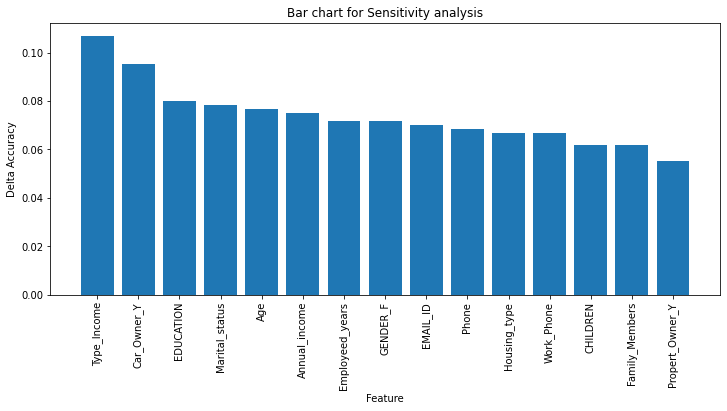

In [ ]:
plt.figure(figsize=(12,5))   # Setting the figure size 
plt.bar(list(sorted_delta_accuracy_dict.keys()),list(sorted_delta_accuracy_dict.values()))   # Creating a bar plot for better visualization
plt.title('Bar chart for Sensitivity analysis')
plt.xlabel('Feature')
plt.ylabel('Delta Accuracy')
plt.xticks(rotation=90)
plt.show()

Type_income, Car_owner and EDUCATION, these are the top 3 most important features that can affect our model.

#**Conclusion**

Based on the analysis performed, it can be concluded that **Support Vector Machine** is the best model for predicting credit card approval.
Additionally, sensitivity analysis has identified the following features as the most important that can affect the model's performance--

1. **Type of income**
2. **Car owner**
3.  **Education**


These findings suggest that these features should be given more attention while making credit card approval decisions. It is recommended to deploy the SVM model in the production environment with the identified important features for predicting credit card approval. However, it is important to note that the performance of the model may vary over time, and data should be monitored and updated regularly to maintain its accuracy and effectiveness.

Based on the results of our analysis, we recommend that the company focus on targeting customers who has a stable job with a regular salary may be seen as a lower risk than someone who earns irregular income from freelance work or self-employment.
Our findings also suggest that the level of education is an important factor in credit card approval, indicating that the company may want to consider offering more targeted credit products for customers with different education levels. Owning a car may indicate a certain level of financial and social stability and responsibility.


Overall, we believe that our model provides valuable insights into the factors that influence credit card approval, and can be used by the company to improve its credit risk management strategies and better serve its customers.